### This script analyses the NWB files and plots the bar plot

In [1]:

# import standard libraries
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter

import numpy as np
from time import time
import csv
import pandas as pd 
from scipy import stats

import sklearn
from sklearn.impute import SimpleImputer as Imputer
from sklearn import preprocessing
from sklearn import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import manifold, datasets

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Plotting options
%matplotlib inline

# Change parameters of the Figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size    

matplotlib.rcParams.update({'font.size': 15})
#plt.style.use(['dark_background'])

In [2]:
# update parameters to make sure the fig size has changed

# Change parameters of the Figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size    


In [3]:
# Loading the data from csv

all_data=pd.read_csv('morpho_features.csv')
all_data.head

<bound method NDFrame.head of                                                   path  wyler_grade_type  \
0    OUT_swc/morphology_data/human/swc/non_upright/...                 1   
1    OUT_swc/morphology_data/human/swc/non_upright/...                 1   
2    OUT_swc/morphology_data/human/swc/non_upright/...                 4   
3    OUT_swc/morphology_data/human/swc/non_upright/...                 4   
4    OUT_swc/morphology_data/human/swc/non_upright/...                 4   
..                                                 ...               ...   
97   OUT_swc/morphology_data/human/swc/non_upright/...                 1   
98   OUT_swc/morphology_data/human/swc/non_upright/...                 1   
99   OUT_swc/morphology_data/human/swc/non_upright/...                 1   
100  OUT_swc/morphology_data/human/swc/non_upright/...                 1   
101  OUT_swc/morphology_data/human/swc/non_upright/...                 1   

     axon_average_diameter  axon_bifurcation_angle_local 

# Drop features related to anatomy, i.e. cell position in 3D

In [4]:

dropped_columns=['axon_width',
'cloud_width',
'dendrite_width',
'basal_dendrite_width',
'apical_dendrite_width',
'all_neurites_width',
'axon_height',
'cloud_height',
'dendrite_height',
'basal_dendrite_height',
'apical_dendrite_height',
'all_neurites_height',
'axon_depth',
'axon_relative_soma_depth',
'cloud_depth',
'dendrite_depth',
'dendrite_relative_soma_depth',
'basal_dendrite_depth',
'basal_dendrite_relative_soma_depth',
'apical_dendrite_depth',
'apical_dendrite_relative_soma_depth',
'all_neurites_depth',
'all_neurites_relative_soma_depth',
'axon_compartment_centroid_over_distance_x',
'axon_compartment_centroid_over_distance_y',
'axon_compartment_centroid_over_distance_z',
'axon_compartment_kurt_x',
'axon_compartment_kurt_y',
'axon_compartment_kurt_z',
'axon_compartment_skew_x',
'axon_compartment_skew_y',
'axon_compartment_skew_z',
'axon_compartment_stdev_over_centroid_x',
'axon_compartment_stdev_over_centroid_y',
'axon_compartment_stdev_over_centroid_z',
'axon_compartment_stdev_over_distance_x',
'axon_compartment_stdev_over_distance_y',
'axon_compartment_stdev_over_distance_z',
'axon_compartment_stdev_x',
'axon_compartment_stdev_y',
'axon_compartment_stdev_z',
'axon_first_compartment_moment_x',
'axon_first_compartment_moment_y',
'axon_first_compartment_moment_z',
'axon_height',
'axon_high_x',
'axon_high_y',
'axon_high_z',
'axon_low_x',
'axon_low_y',
'axon_low_z',
'cloud_compartment_kurt_x',
'cloud_compartment_kurt_y',
'cloud_compartment_kurt_z',
'cloud_compartment_skew_x',
'cloud_compartment_skew_y',
'cloud_compartment_skew_z',
'cloud_compartment_stdev_x',
'cloud_compartment_stdev_y',
'cloud_compartment_stdev_z',
'cloud_first_compartment_moment_x',
'cloud_first_compartment_moment_y',
'cloud_first_compartment_moment_z',
'cloud_high_x',
'cloud_high_y',
'cloud_high_z',
'cloud_low_x',
'cloud_low_y',
'cloud_low_z',
'dendrite_bifurcation_centroid_over_distance_x',
'dendrite_bifurcation_centroid_over_distance_y',
'dendrite_bifurcation_centroid_over_distance_z',
'dendrite_bifurcation_kurt_x',
'dendrite_bifurcation_kurt_y',
'dendrite_bifurcation_kurt_z',
'dendrite_bifurcation_skew_x',
'dendrite_bifurcation_skew_y',
'dendrite_bifurcation_skew_z',
'dendrite_bifurcation_stdev_over_centroid_x',
'dendrite_bifurcation_stdev_over_centroid_y',
'dendrite_bifurcation_stdev_over_centroid_z',
'dendrite_bifurcation_stdev_over_distance_x',
'dendrite_bifurcation_stdev_over_distance_y',
'dendrite_bifurcation_stdev_over_distance_z',
'dendrite_bifurcation_stdev_x',
'dendrite_bifurcation_stdev_y',
'dendrite_bifurcation_stdev_z',
'dendrite_compartment_centroid_over_distance_x',
'dendrite_compartment_centroid_over_distance_y',
'dendrite_compartment_centroid_over_distance_z',
'dendrite_compartment_kurt_x',
'dendrite_compartment_kurt_y',
'dendrite_compartment_kurt_z',
'dendrite_compartment_skew_x',
'dendrite_compartment_skew_y',
'dendrite_compartment_skew_z',
'dendrite_compartment_stdev_over_centroid_x',
'dendrite_compartment_stdev_over_centroid_y',
'dendrite_compartment_stdev_over_centroid_z',
'dendrite_compartment_stdev_over_distance_x',
'dendrite_compartment_stdev_over_distance_y',
'dendrite_compartment_stdev_over_distance_z',
'dendrite_compartment_stdev_x',
'dendrite_compartment_stdev_y',
'dendrite_compartment_stdev_z',
'dendrite_first_bifurcation_moment_x',
'dendrite_first_bifurcation_moment_y',
'dendrite_first_bifurcation_moment_z',
'dendrite_first_compartment_moment_x',
'dendrite_first_compartment_moment_y',
'dendrite_first_compartment_moment_z',
'dendrite_high_x',
'dendrite_high_y',
'dendrite_high_z',
'dendrite_low_x',
'dendrite_low_y',
'dendrite_low_z',
'basal_dendrite_compartment_centroid_over_distance_x',
'basal_dendrite_compartment_centroid_over_distance_y',
'basal_dendrite_compartment_centroid_over_distance_z',
'basal_dendrite_compartment_kurt_x',
'basal_dendrite_compartment_kurt_y',
'basal_dendrite_compartment_kurt_z',
'basal_dendrite_compartment_skew_x',
'basal_dendrite_compartment_skew_y',
'basal_dendrite_compartment_skew_z',
'basal_dendrite_compartment_stdev_over_centroid_x',
'basal_dendrite_compartment_stdev_over_centroid_y',
'basal_dendrite_compartment_stdev_over_centroid_z',
'basal_dendrite_compartment_stdev_over_distance_x',
'basal_dendrite_compartment_stdev_over_distance_y',
'basal_dendrite_compartment_stdev_over_distance_z',
'basal_dendrite_compartment_stdev_x',
'basal_dendrite_compartment_stdev_y',
'basal_dendrite_compartment_stdev_z',
'basal_dendrite_first_compartment_moment_x',
'basal_dendrite_first_compartment_moment_y',
'basal_dendrite_first_compartment_moment_z',
'basal_dendrite_high_x',
'basal_dendrite_high_y',
'basal_dendrite_high_z',
'basal_dendrite_low_x',
'basal_dendrite_low_y',
'basal_dendrite_low_z',
'apical_dendrite_bifurcation_centroid_over_distance_x',
'apical_dendrite_bifurcation_centroid_over_distance_y',
'apical_dendrite_bifurcation_centroid_over_distance_z',
'apical_dendrite_bifurcation_kurt_x',
'apical_dendrite_bifurcation_kurt_y',
'apical_dendrite_bifurcation_kurt_z',
'apical_dendrite_bifurcation_skew_x',
'apical_dendrite_bifurcation_skew_y',
'apical_dendrite_bifurcation_skew_z',
'apical_dendrite_bifurcation_stdev_over_centroid_x',
'apical_dendrite_bifurcation_stdev_over_centroid_y',
'apical_dendrite_bifurcation_stdev_over_centroid_z',
'apical_dendrite_bifurcation_stdev_over_distance_x',
'apical_dendrite_bifurcation_stdev_over_distance_y',
'apical_dendrite_bifurcation_stdev_over_distance_z',
'apical_dendrite_bifurcation_stdev_x',
'apical_dendrite_bifurcation_stdev_y',
'apical_dendrite_bifurcation_stdev_z',
'apical_dendrite_compartment_centroid_over_distance_x',
'apical_dendrite_compartment_centroid_over_distance_y',
'apical_dendrite_compartment_centroid_over_distance_z',
'apical_dendrite_compartment_kurt_x',
'apical_dendrite_compartment_kurt_y',
'apical_dendrite_compartment_kurt_z',
'apical_dendrite_compartment_skew_x',
'apical_dendrite_compartment_skew_y',
'apical_dendrite_compartment_skew_z',
'apical_dendrite_compartment_stdev_over_centroid_x',
'apical_dendrite_compartment_stdev_over_centroid_y',
'apical_dendrite_compartment_stdev_over_centroid_z',
'apical_dendrite_compartment_stdev_over_distance_x',
'apical_dendrite_compartment_stdev_over_distance_y',
'apical_dendrite_compartment_stdev_over_distance_z',
'apical_dendrite_compartment_stdev_x',
'apical_dendrite_compartment_stdev_y',
'apical_dendrite_compartment_stdev_z',
'apical_dendrite_first_bifurcation_moment_x',
'apical_dendrite_first_bifurcation_moment_y',
'apical_dendrite_first_bifurcation_moment_z',
'apical_dendrite_first_compartment_moment_x',
'apical_dendrite_first_compartment_moment_y',
'apical_dendrite_first_compartment_moment_z',
'apical_dendrite_high_x',
'apical_dendrite_high_y',
'apical_dendrite_high_z',
'apical_dendrite_low_x',
'apical_dendrite_low_y',
'apical_dendrite_low_z',
'all_neurites_compartment_centroid_over_distance_x',
'all_neurites_compartment_centroid_over_distance_y',
'all_neurites_compartment_centroid_over_distance_z',
'all_neurites_compartment_kurt_x',
'all_neurites_compartment_kurt_y',
'all_neurites_compartment_kurt_z',
'all_neurites_compartment_skew_x',
'all_neurites_compartment_skew_y',
'all_neurites_compartment_skew_z',
'all_neurites_compartment_stdev_over_centroid_x',
'all_neurites_compartment_stdev_over_centroid_y',
'all_neurites_compartment_stdev_over_centroid_z',
'all_neurites_compartment_stdev_over_distance_x',
'all_neurites_compartment_stdev_over_distance_y',
'all_neurites_compartment_stdev_over_distance_z',
'all_neurites_compartment_stdev_x',
'all_neurites_compartment_stdev_y',
'all_neurites_compartment_stdev_z',
'all_neurites_compartment_stdev_x',
'all_neurites_first_compartment_moment_x',
'all_neurites_first_compartment_moment_y',
'all_neurites_first_compartment_moment_z',
'all_neurites_high_x',
'all_neurites_high_y',
'all_neurites_high_z',
'all_neurites_low_x',
'all_neurites_low_y',
'all_neurites_low_z',
'all_neurites_compartment_centroid_over_distance_x',
'all_neurites_compartment_centroid_over_distance_y',
'all_neurites_compartment_centroid_over_distance_z',
'all_neurites_compartment_kurt_x',
'all_neurites_compartment_kurt_y',
'all_neurites_compartment_kurt_z',
'all_neurites_compartment_skew_x',
'all_neurites_compartment_skew_y',
'all_neurites_compartment_skew_z']

## add axonal to dropped features

In [5]:
axonal_features = [
'axon_average_diameter',
'axon_bifurcation_angle_local',
'axon_bifurcation_angle_remote',
'axon_bifurcation_centroid_over_distance_x',
'axon_bifurcation_centroid_over_distance_y',
'axon_bifurcation_centroid_over_distance_z',
'axon_bifurcation_kurt_x',
'axon_bifurcation_kurt_y',
'axon_bifurcation_kurt_z',
'axon_bifurcation_skew_x',
'axon_bifurcation_skew_y',
'axon_bifurcation_skew_z',
'axon_bifurcation_stdev_over_centroid_x',
'axon_bifurcation_stdev_over_centroid_y',
'axon_bifurcation_stdev_over_centroid_z',
'axon_bifurcation_stdev_over_distance_x',
'axon_bifurcation_stdev_over_distance_y',
'axon_bifurcation_stdev_over_distance_z',
'axon_bifurcation_stdev_x',
'axon_bifurcation_stdev_z',
'axon_compartment_centroid_over_distance_x',
'axon_compartment_centroid_over_distance_y',
'axon_compartment_centroid_over_distance_z',
'axon_compartment_kurt_x',
'axon_compartment_kurt_y',
'axon_compartment_kurt_z',
'axon_compartment_skew_x',
'axon_compartment_skew_y',
'axon_compartment_skew_z',
'axon_compartment_stdev_over_centroid_x',
'axon_compartment_stdev_over_centroid_y',
'axon_compartment_stdev_over_centroid_z',
'axon_compartment_stdev_over_distance_x',
'axon_compartment_stdev_over_distance_y',
'axon_compartment_stdev_over_distance_z',
'axon_compartment_stdev_x',
'axon_compartment_stdev_y',
'axon_compartment_stdev_z',
'axon_contraction',
'axon_depth',
'axon_early_branch',
'axon_first_bifurcation_moment_x',
'axon_first_bifurcation_moment_y',
'axon_first_bifurcation_moment_z',
'axon_first_compartment_moment_x',
'axon_first_compartment_moment_y',
'axon_first_compartment_moment_z',
'axon_height',
'axon_high_x',
'axon_high_y',
'axon_high_z',
'axon_low_x',
'axon_low_y',
'axon_low_z',
'axon_max_branch_order',
'axon_max_euclidean_distance',
'axon_max_path_distance',
'axon_mean_fragmentation',
'axon_mean_parent_daughter_ratio',
'axon_neurites_over_branches',
'axon_num_bifurcations',
'axon_num_branches',
'axon_num_neurites',
'axon_num_nodes',
'axon_num_outer_bifurcations',
'axon_num_stems',
'axon_num_tips',
'axon_parent_daughter_ratio',
'axon_relative_soma_depth',
'axon_soma_distance',
'axon_soma_surface',
'axon_soma_theta',
'axon_total_length',
'axon_total_surface',
'axon_total_volume',
'axon_width'
]

dropped_columns = dropped_columns + axonal_features

print(dropped_columns)

['axon_width', 'cloud_width', 'dendrite_width', 'basal_dendrite_width', 'apical_dendrite_width', 'all_neurites_width', 'axon_height', 'cloud_height', 'dendrite_height', 'basal_dendrite_height', 'apical_dendrite_height', 'all_neurites_height', 'axon_depth', 'axon_relative_soma_depth', 'cloud_depth', 'dendrite_depth', 'dendrite_relative_soma_depth', 'basal_dendrite_depth', 'basal_dendrite_relative_soma_depth', 'apical_dendrite_depth', 'apical_dendrite_relative_soma_depth', 'all_neurites_depth', 'all_neurites_relative_soma_depth', 'axon_compartment_centroid_over_distance_x', 'axon_compartment_centroid_over_distance_y', 'axon_compartment_centroid_over_distance_z', 'axon_compartment_kurt_x', 'axon_compartment_kurt_y', 'axon_compartment_kurt_z', 'axon_compartment_skew_x', 'axon_compartment_skew_y', 'axon_compartment_skew_z', 'axon_compartment_stdev_over_centroid_x', 'axon_compartment_stdev_over_centroid_y', 'axon_compartment_stdev_over_centroid_z', 'axon_compartment_stdev_over_distance_x', '

## add all neurites features to dropped features

In [6]:
neurite_features = [
'all_neurites_average_diameter',
'all_neurites_bifurcation_angle_local',
'all_neurites_bifurcation_angle_remote',
'all_neurites_bifurcation_centroid_over_distance_x',
'all_neurites_bifurcation_centroid_over_distance_y',
'all_neurites_bifurcation_centroid_over_distance_z',
'all_neurites_bifurcation_kurt_x',
'all_neurites_bifurcation_kurt_y',
'all_neurites_bifurcation_kurt_z',
'all_neurites_bifurcation_skew_x',
'all_neurites_bifurcation_skew_y',
'all_neurites_bifurcation_skew_z',
'all_neurites_bifurcation_stdev_over_centroid_x',
'all_neurites_bifurcation_stdev_over_centroid_y',
'all_neurites_bifurcation_stdev_over_centroid_z',
'all_neurites_bifurcation_stdev_over_distance_x',
'all_neurites_bifurcation_stdev_over_distance_y',
'all_neurites_bifurcation_stdev_over_distance_z',
'all_neurites_bifurcation_stdev_x',
'all_neurites_bifurcation_stdev_y',
'all_neurites_bifurcation_stdev_z',
'all_neurites_compartment_centroid_over_distance_x',
'all_neurites_compartment_centroid_over_distance_y',
'all_neurites_compartment_centroid_over_distance_z',
'all_neurites_compartment_kurt_x',
'all_neurites_compartment_kurt_y',
'all_neurites_compartment_kurt_z',
'all_neurites_compartment_skew_x',
'all_neurites_compartment_skew_y',
'all_neurites_compartment_skew_z',
'all_neurites_compartment_stdev_over_centroid_x',
'all_neurites_compartment_stdev_over_centroid_y',
'all_neurites_compartment_stdev_over_centroid_z',
'all_neurites_compartment_stdev_over_distance_x',
'all_neurites_compartment_stdev_over_distance_y',
'all_neurites_compartment_stdev_over_distance_z',
'all_neurites_compartment_stdev_x',
'all_neurites_compartment_stdev_y',
'all_neurites_compartment_stdev_z',
'all_neurites_contraction',
'all_neurites_depth',
'all_neurites_early_branch',
'all_neurites_first_bifurcation_moment_x',
'all_neurites_first_bifurcation_moment_y',
'all_neurites_first_bifurcation_moment_z',
'all_neurites_first_compartment_moment_x',
'all_neurites_first_compartment_moment_y',
'all_neurites_first_compartment_moment_z',
'all_neurites_height',
'all_neurites_high_x',
'all_neurites_high_y',
'all_neurites_high_z',
'all_neurites_low_x',
'all_neurites_low_y',
'all_neurites_low_z',
'all_neurites_max_branch_order',
'all_neurites_max_euclidean_distance',
'all_neurites_max_path_distance',
'all_neurites_mean_fragmentation',
'all_neurites_mean_parent_daughter_ratio',
'all_neurites_neurites_over_branches',
'all_neurites_num_bifurcations',
'all_neurites_num_branches',
'all_neurites_num_neurites',
'all_neurites_num_nodes',
'all_neurites_num_outer_bifurcations',
'all_neurites_num_stems',
'all_neurites_num_tips',
'all_neurites_parent_daughter_ratio',
'all_neurites_relative_soma_depth',
'all_neurites_soma_distance',
'all_neurites_soma_surface',
'all_neurites_soma_theta',
'all_neurites_total_length',
'all_neurites_total_surface',
'all_neurites_total_volume',
'all_neurites_width'
]

dropped_columns = dropped_columns + neurite_features

print(dropped_columns)

['axon_width', 'cloud_width', 'dendrite_width', 'basal_dendrite_width', 'apical_dendrite_width', 'all_neurites_width', 'axon_height', 'cloud_height', 'dendrite_height', 'basal_dendrite_height', 'apical_dendrite_height', 'all_neurites_height', 'axon_depth', 'axon_relative_soma_depth', 'cloud_depth', 'dendrite_depth', 'dendrite_relative_soma_depth', 'basal_dendrite_depth', 'basal_dendrite_relative_soma_depth', 'apical_dendrite_depth', 'apical_dendrite_relative_soma_depth', 'all_neurites_depth', 'all_neurites_relative_soma_depth', 'axon_compartment_centroid_over_distance_x', 'axon_compartment_centroid_over_distance_y', 'axon_compartment_centroid_over_distance_z', 'axon_compartment_kurt_x', 'axon_compartment_kurt_y', 'axon_compartment_kurt_z', 'axon_compartment_skew_x', 'axon_compartment_skew_y', 'axon_compartment_skew_z', 'axon_compartment_stdev_over_centroid_x', 'axon_compartment_stdev_over_centroid_y', 'axon_compartment_stdev_over_centroid_z', 'axon_compartment_stdev_over_distance_x', '

# Remove duplicated features: advice from Staci

In [7]:
staci_features = [
'dendrite_bifurcation_angle_local',
'dendrite_bifurcation_angle_remote',
'dendrite_mean_fragmentation',
'dendrite_num_neurites',
'dendrite_num_nodes',
'basal_dendrite_num_neurites',
'basal_dendrite_num_nodes',
'basal_dendrite_soma_surface',
'apical_dendrite_bifurcation_angle_local',
'apical_dendrite_bifurcation_angle_remote',
'apical_dendrite_mean_fragmentation',
'apical_dendrite_num_neurites',
'apical_dendrite_num_nodes',
'apical_dendrite_soma_surface'
]

dropped_columns = dropped_columns + staci_features

print(dropped_columns)

['axon_width', 'cloud_width', 'dendrite_width', 'basal_dendrite_width', 'apical_dendrite_width', 'all_neurites_width', 'axon_height', 'cloud_height', 'dendrite_height', 'basal_dendrite_height', 'apical_dendrite_height', 'all_neurites_height', 'axon_depth', 'axon_relative_soma_depth', 'cloud_depth', 'dendrite_depth', 'dendrite_relative_soma_depth', 'basal_dendrite_depth', 'basal_dendrite_relative_soma_depth', 'apical_dendrite_depth', 'apical_dendrite_relative_soma_depth', 'all_neurites_depth', 'all_neurites_relative_soma_depth', 'axon_compartment_centroid_over_distance_x', 'axon_compartment_centroid_over_distance_y', 'axon_compartment_centroid_over_distance_z', 'axon_compartment_kurt_x', 'axon_compartment_kurt_y', 'axon_compartment_kurt_z', 'axon_compartment_skew_x', 'axon_compartment_skew_y', 'axon_compartment_skew_z', 'axon_compartment_stdev_over_centroid_x', 'axon_compartment_stdev_over_centroid_y', 'axon_compartment_stdev_over_centroid_z', 'axon_compartment_stdev_over_distance_x', '

# Extract features from pandas

In [8]:
# remove path column
all_data_core=all_data.loc[:, all_data.columns != 'path']

# remove wyler grade column
all_data_core=all_data_core.loc[:, all_data_core.columns != 'wyler_grade_type']

# drope the columns with too many NaN's in the data, dropNaN returns a new dataframe

# DROP ALL NON-MORPHOLOGICAL FEATURES
all_data_core=all_data_core.drop(dropped_columns, axis=1)

# when there are more than 5 NaNs, we do not use this feature!
all_data_core=all_data_core.dropna(thresh=len(all_data_core)-15, axis=1)

# create the numpy array
all_features=all_data_core.to_numpy()

# determine the number of features
n_features=len(all_features[0,:])
print('Number of features')
print(n_features)

print('\n')

print('all_features shape')
print(all_features.shape)

Number of features
49


all_features shape
(102, 49)


In [10]:
# show features

used_features=all_data_core.columns.values
# print
print(len(all_data_core.columns))

49


In [11]:
for i in range(len(used_features)):
    print(used_features[i])

dendrite_average_diameter
dendrite_contraction
dendrite_early_branch
dendrite_max_branch_order
dendrite_max_euclidean_distance
dendrite_max_path_distance
dendrite_mean_parent_daughter_ratio
dendrite_neurites_over_branches
dendrite_num_bifurcations
dendrite_num_branches
dendrite_num_outer_bifurcations
dendrite_num_stems
dendrite_num_tips
dendrite_parent_daughter_ratio
dendrite_soma_surface
dendrite_total_length
dendrite_total_surface
dendrite_total_volume
basal_dendrite_average_diameter
basal_dendrite_early_branch
basal_dendrite_max_branch_order
basal_dendrite_max_euclidean_distance
basal_dendrite_max_path_distance
basal_dendrite_neurites_over_branches
basal_dendrite_num_bifurcations
basal_dendrite_num_branches
basal_dendrite_num_outer_bifurcations
basal_dendrite_num_stems
basal_dendrite_num_tips
basal_dendrite_total_length
basal_dendrite_total_surface
basal_dendrite_total_volume
apical_dendrite_average_diameter
apical_dendrite_contraction
apical_dendrite_early_branch
apical_dendrite_ma

# Plot feature names

In [12]:

feature_names=list(all_data_core.columns.values)

# print the number of features
for i, item in enumerate(feature_names):
    print(str(i)+str(': ')+ str(feature_names[i]))
    
    # create a string with particular sequence and add it to the library


0: dendrite_average_diameter
1: dendrite_contraction
2: dendrite_early_branch
3: dendrite_max_branch_order
4: dendrite_max_euclidean_distance
5: dendrite_max_path_distance
6: dendrite_mean_parent_daughter_ratio
7: dendrite_neurites_over_branches
8: dendrite_num_bifurcations
9: dendrite_num_branches
10: dendrite_num_outer_bifurcations
11: dendrite_num_stems
12: dendrite_num_tips
13: dendrite_parent_daughter_ratio
14: dendrite_soma_surface
15: dendrite_total_length
16: dendrite_total_surface
17: dendrite_total_volume
18: basal_dendrite_average_diameter
19: basal_dendrite_early_branch
20: basal_dendrite_max_branch_order
21: basal_dendrite_max_euclidean_distance
22: basal_dendrite_max_path_distance
23: basal_dendrite_neurites_over_branches
24: basal_dendrite_num_bifurcations
25: basal_dendrite_num_branches
26: basal_dendrite_num_outer_bifurcations
27: basal_dendrite_num_stems
28: basal_dendrite_num_tips
29: basal_dendrite_total_length
30: basal_dendrite_total_surface
31: basal_dendrite_tot

# Show data matrix shape

In [13]:
# Define the cell type and plot the matrix

#define the cell type
cell_type=all_data['wyler_grade_type'].to_numpy()
# cell_type=np.array(cell_type)
#print cell_type

print(cell_type.shape)

(102,)


# Patient groups

In [14]:
# here is the patient group for the classifier split
# checked manually based on the table

patient_label=np.zeros(len(cell_type))

# set up patient labels manually
# H16.06.008
patient_label[0:2]=1
# H16.06.013
patient_label[2:16]=2
# H17.06.012
patient_label[16:31]=3
# H17.06.014
patient_label[31:44]=4
# H17.06.015
patient_label[44:57]=5
# H18.06.366
patient_label[57:78]=6
# H18.06.368
patient_label[78:102]=7

print(patient_label)

print(len(patient_label))

[1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7.]
102


# Plot the cell type information

In [15]:
# run once

print('Plot the cell type')

# create the cell type with only 2 classes
cell_type_14=np.array(cell_type)
cell_type_14[np.where(np.array(cell_type) == 11)]=1
cell_type_14=np.concatenate([cell_type_14],axis=0)

# concatenate the previous cell_type too
cell_type=np.concatenate([cell_type],axis=0)

print(cell_type_14)

Plot the cell type
[1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Visualise the original data matrix

Data size
(102, 49)


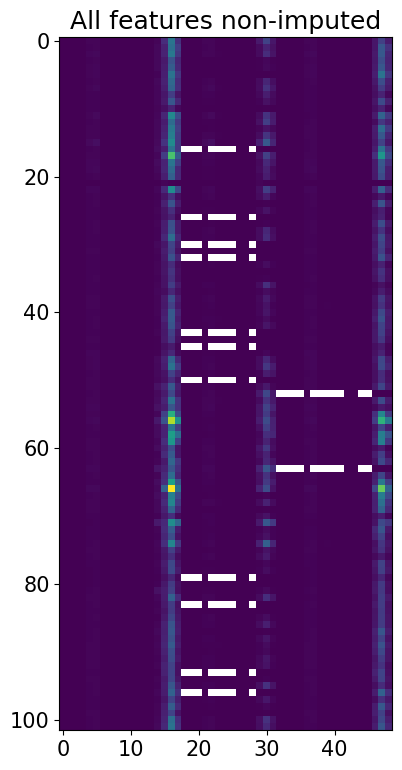

In [16]:

plt.imshow(all_features)
plt.title('All features non-imputed')

print('Data size')
print(all_features.shape)

# Impute NaNs with the medians

Data length
102


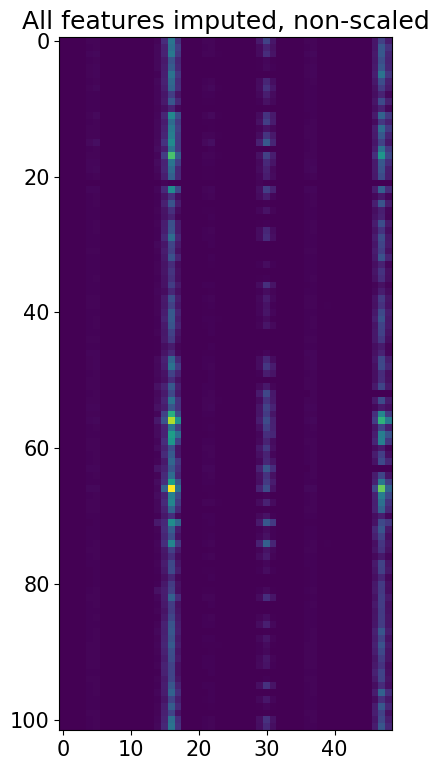

In [17]:

# impute all NaNs in the array and replace with the mean
imp = Imputer(missing_values=np.nan, strategy='median')
imp.fit(all_features)

# replace all NaNs
all_features_new=imp.transform(all_features)

plt.imshow(all_features_new)
plt.title('All features imputed, non-scaled')

print('Data length')
print(len(all_features_new))


# Pairwise comparison with Bonferoni correction: WG1 vs WG4

Text(0.5, 1.0, '-log_10(P) MannWhithney test (unsorted: WG1 vs WG4)')

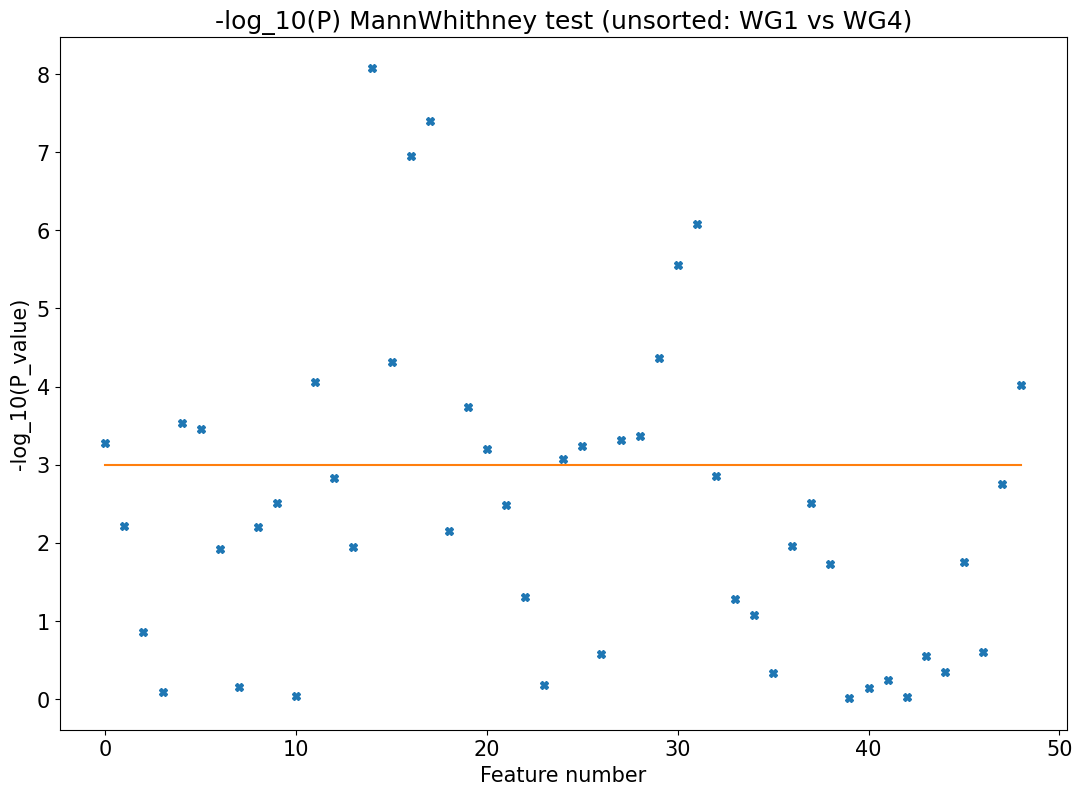

In [18]:

# set up the p-values vector
p_values=np.zeros(n_features)


for i in range(0,n_features):
    # take only the indexes of the cell_type specific elements
    wg1=np.zeros(1)
    wg4=np.zeros(1)
    wg1=all_features_new[np.where(cell_type_14==1),i]
    wg4=all_features_new[np.where(cell_type_14==4),i]
    # do the stat test and save the results
    d,p=stats.mannwhitneyu(wg1[0],wg4[0])
    p_values[i]=p

# plot the results of feature comparison

#plt.plot(p_values,'X')

# significance level
alpha_level=0.05
p_level=alpha_level/n_features
sign_level=np.zeros(n_features)
sign_level[:]=-np.log10(p_level)
log_p=-np.log10(p_values) # initial log_p


plt.plot(np.arange(0,n_features,1),log_p,'X',np.arange(0,n_features,1),sign_level)
plt.ylabel('-log_10(P_value)')
plt.xlabel('Feature number')
plt.title('-log_10(P) MannWhithney test (unsorted: WG1 vs WG4)')

# save figure to eps
#plt.savefig('all_morpho_features_MannWhithey_bonferoni_stars.eps',format='eps',dpi=300)

# Show pair-wise feature comparisons as box plots

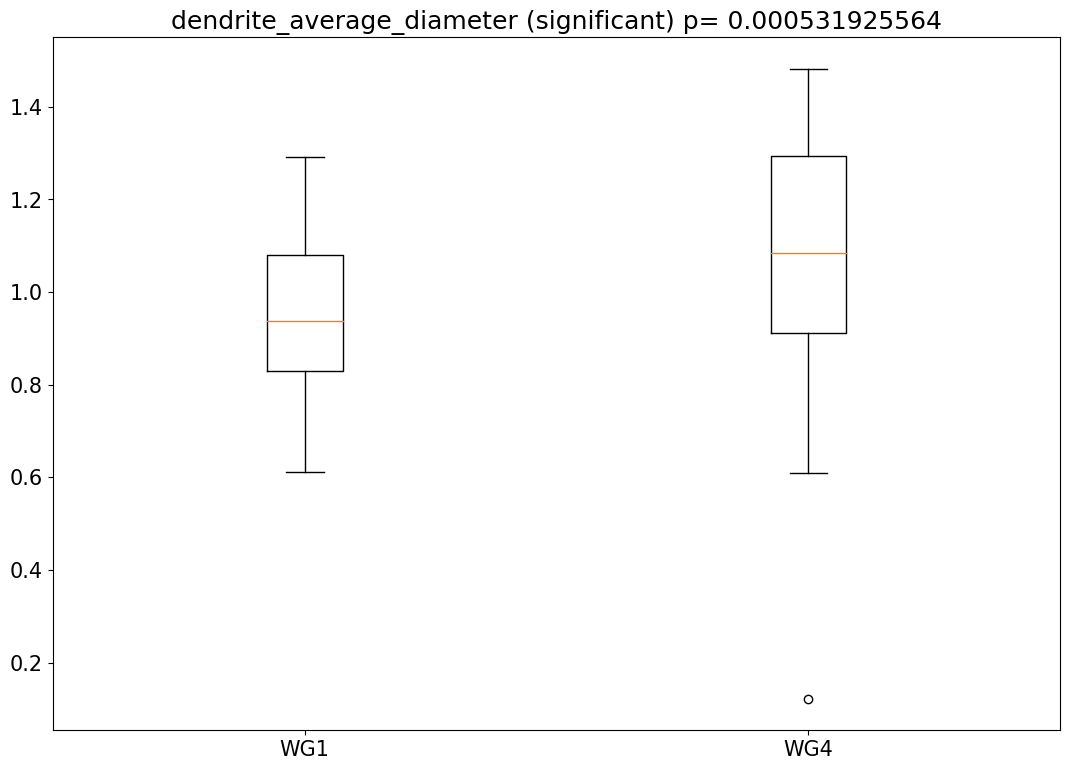

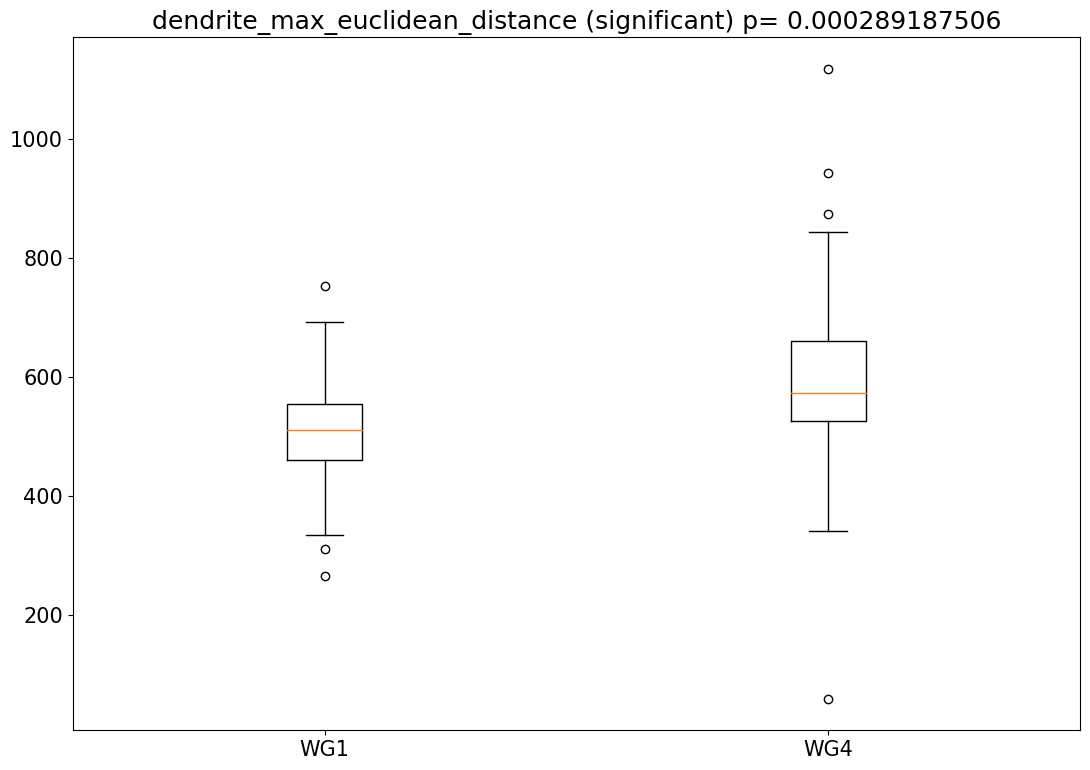

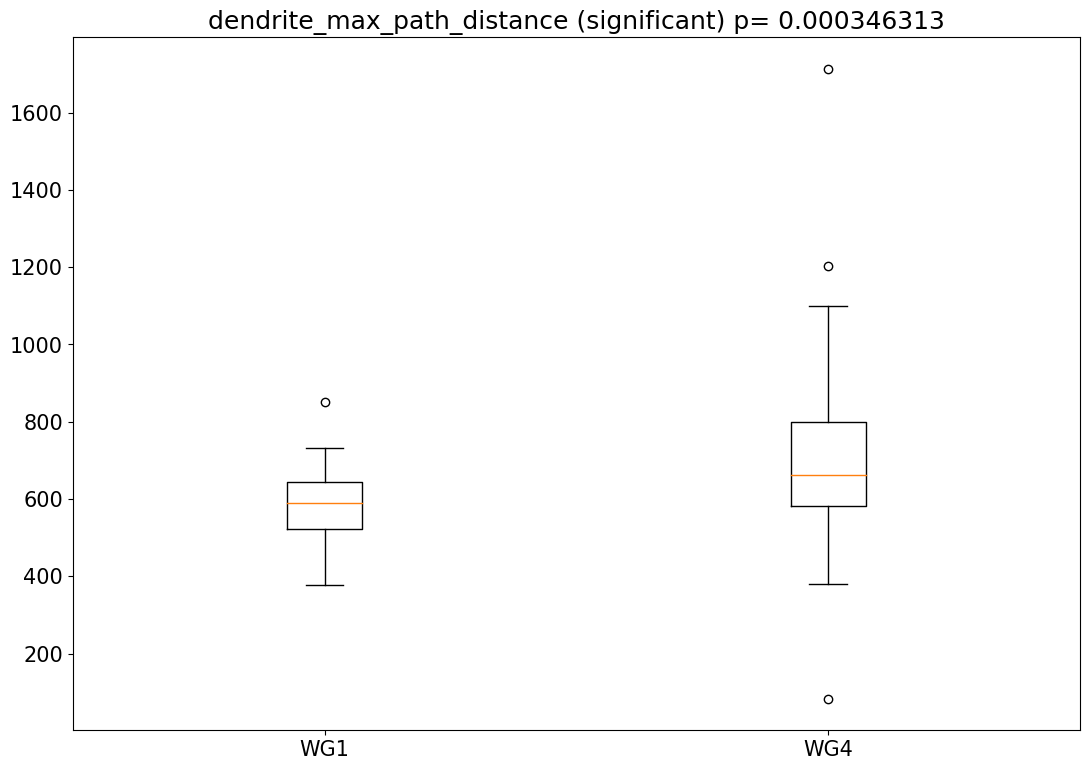

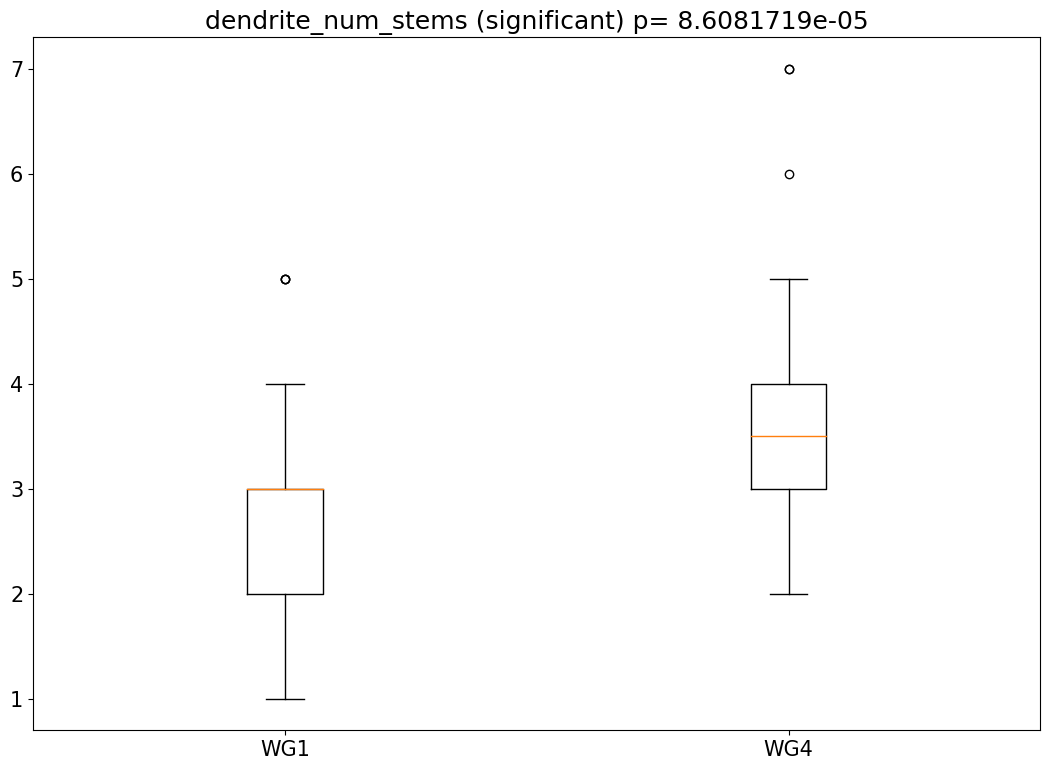

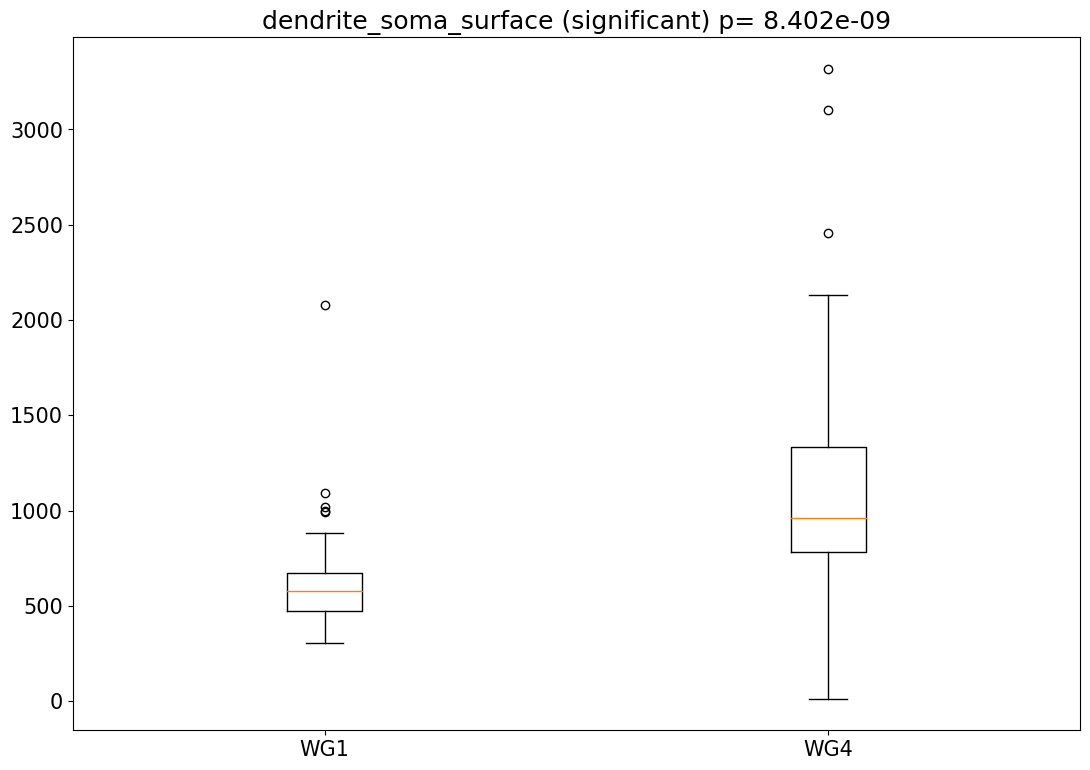

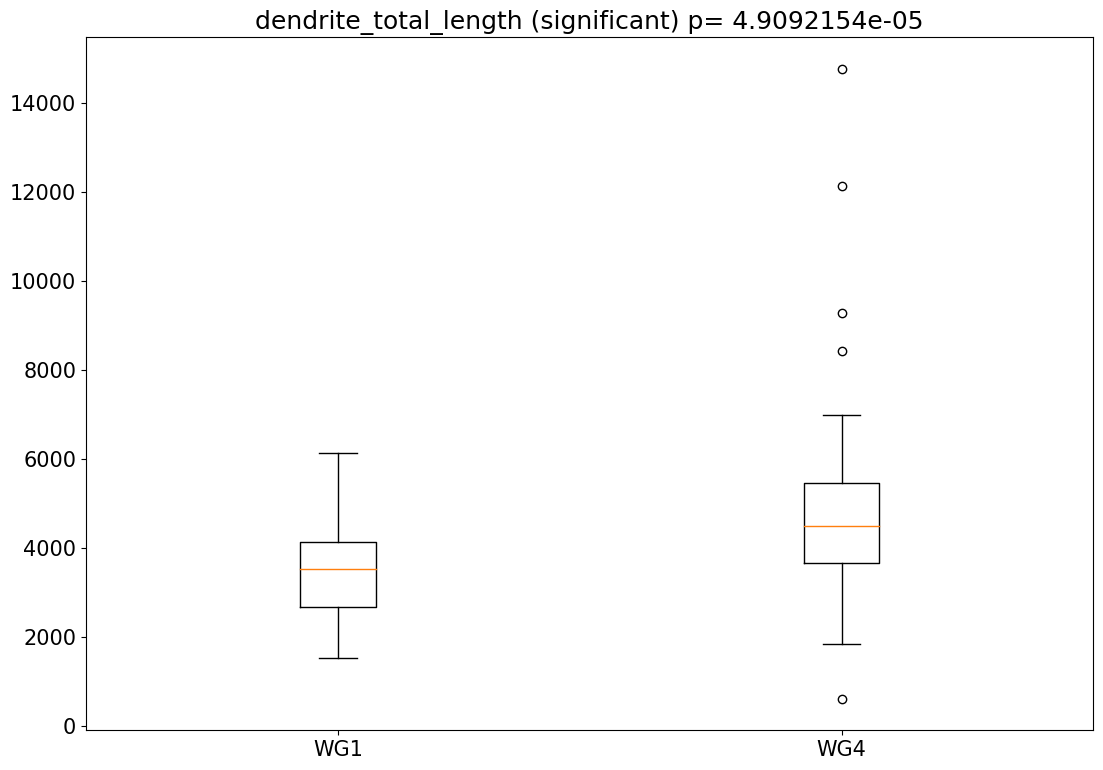

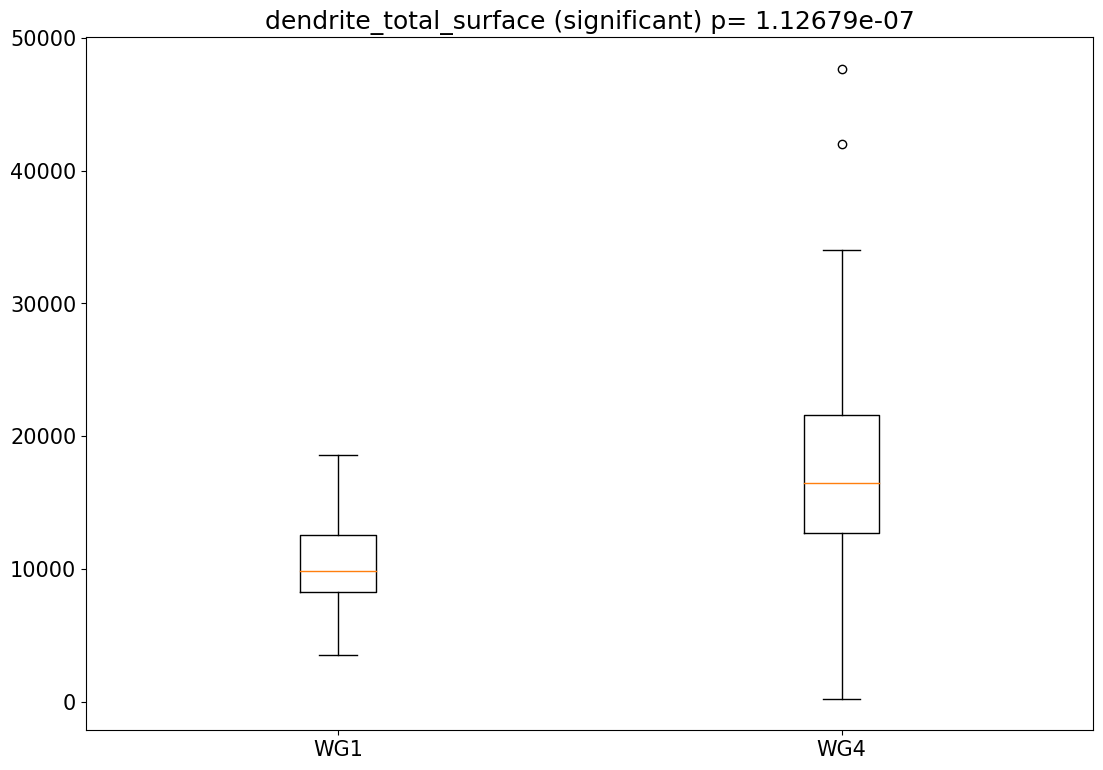

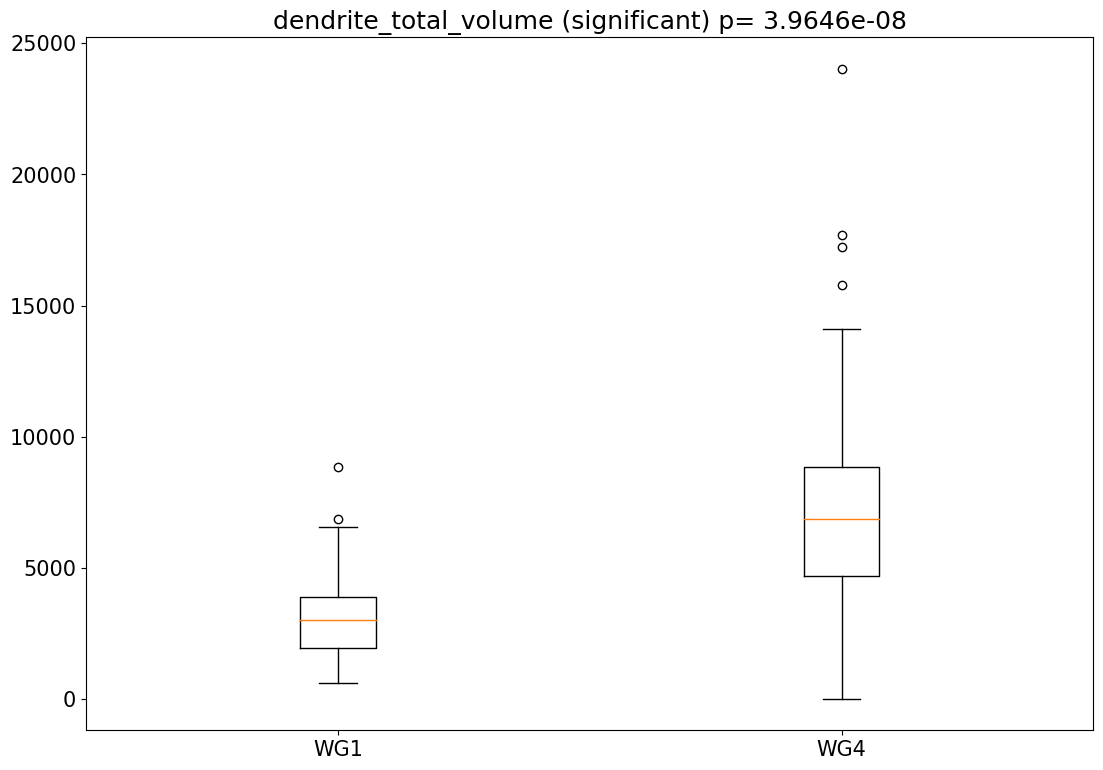

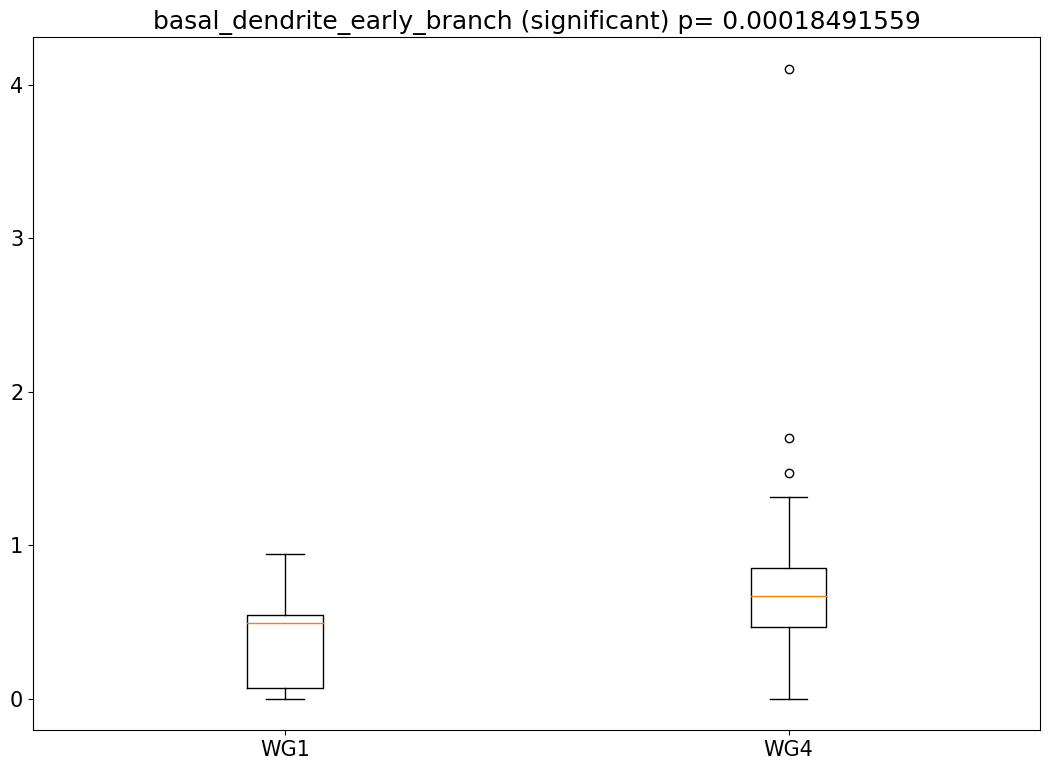

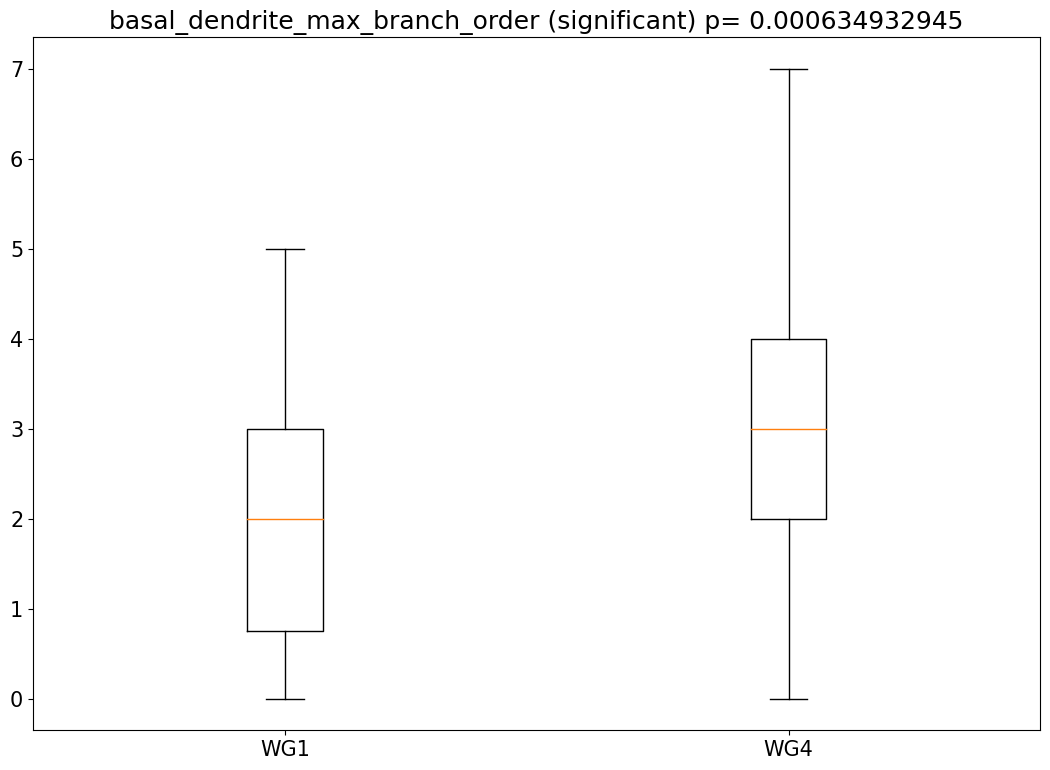

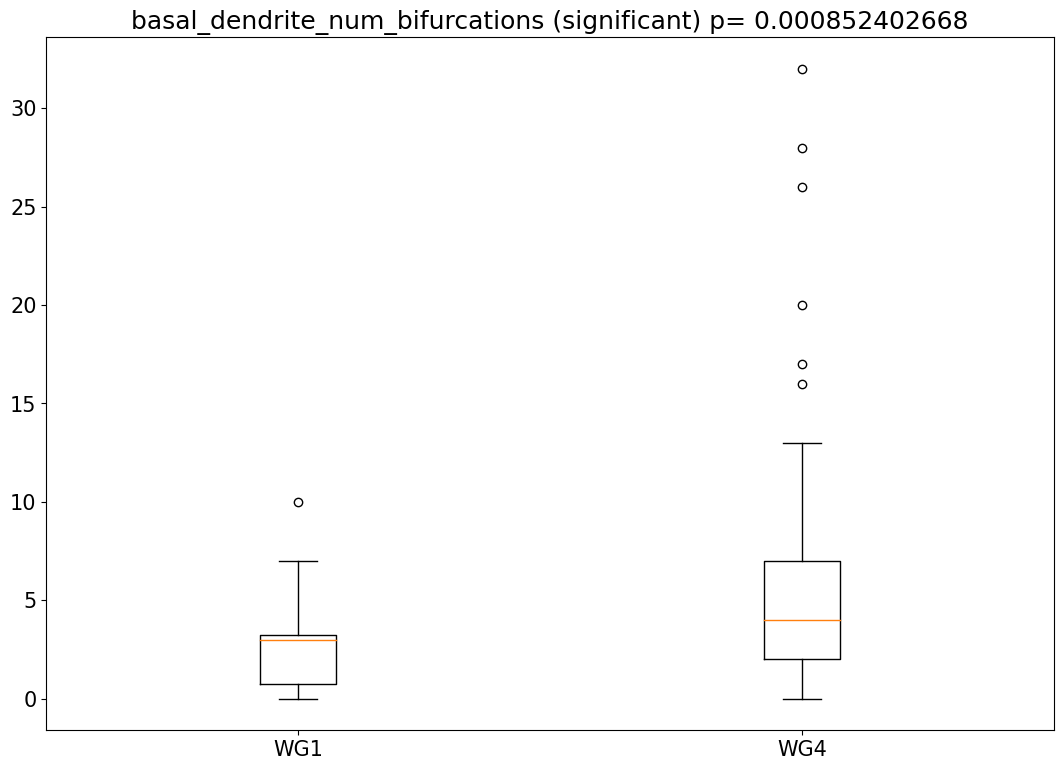

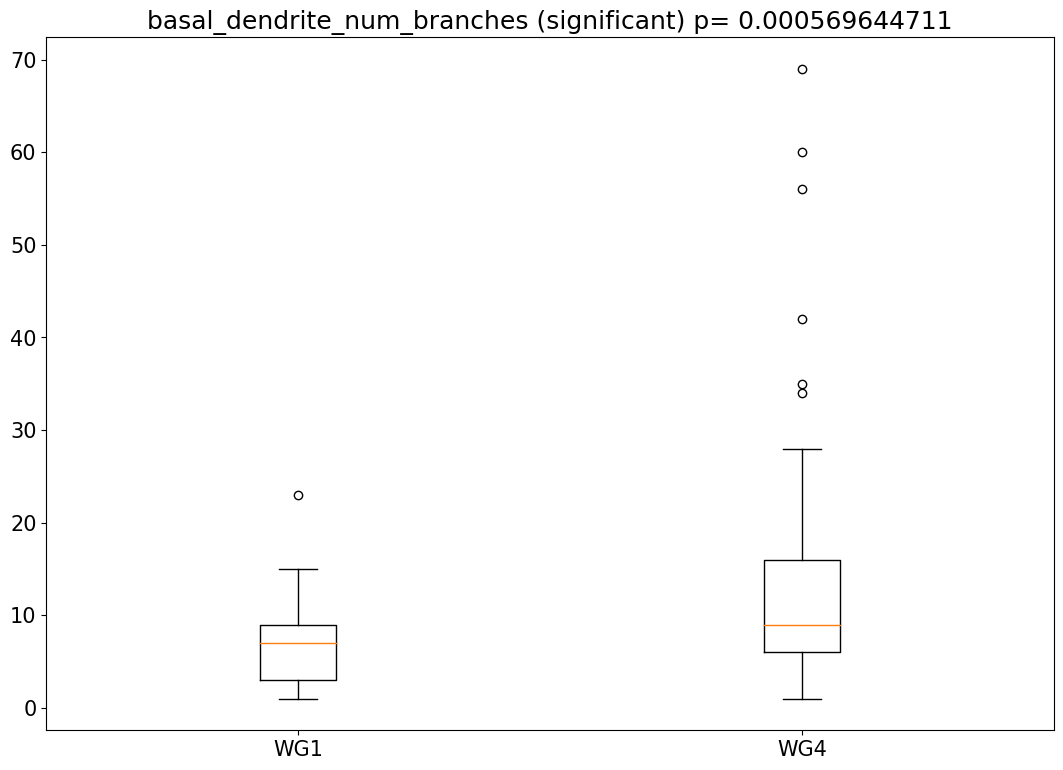

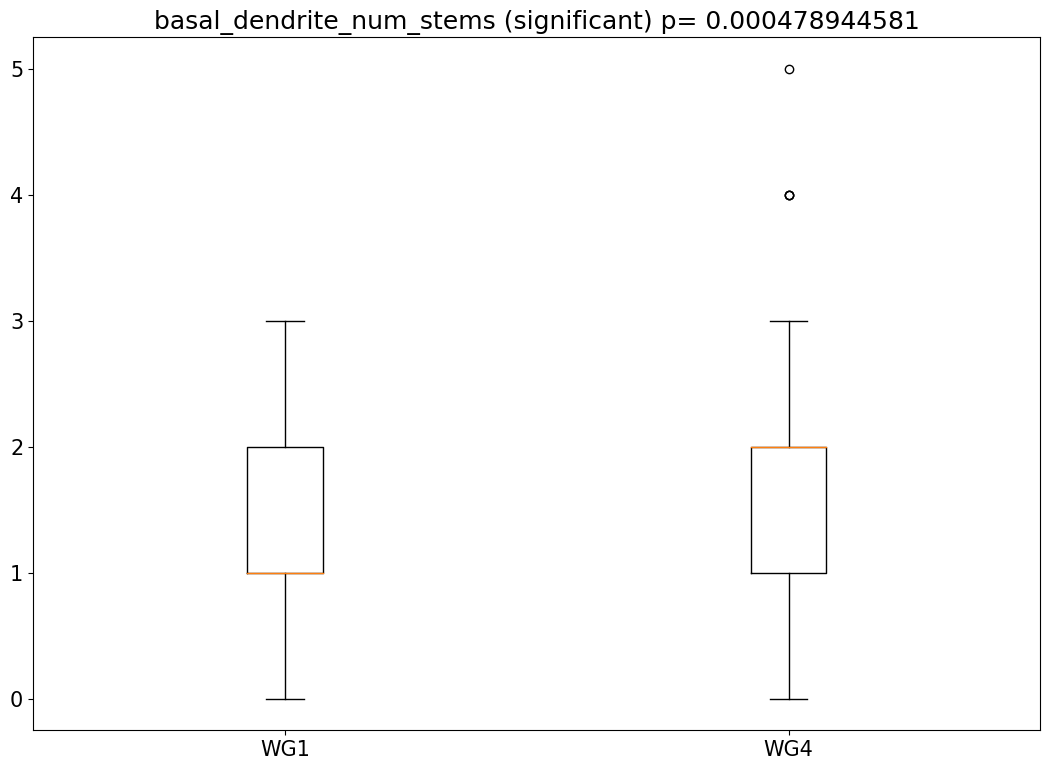

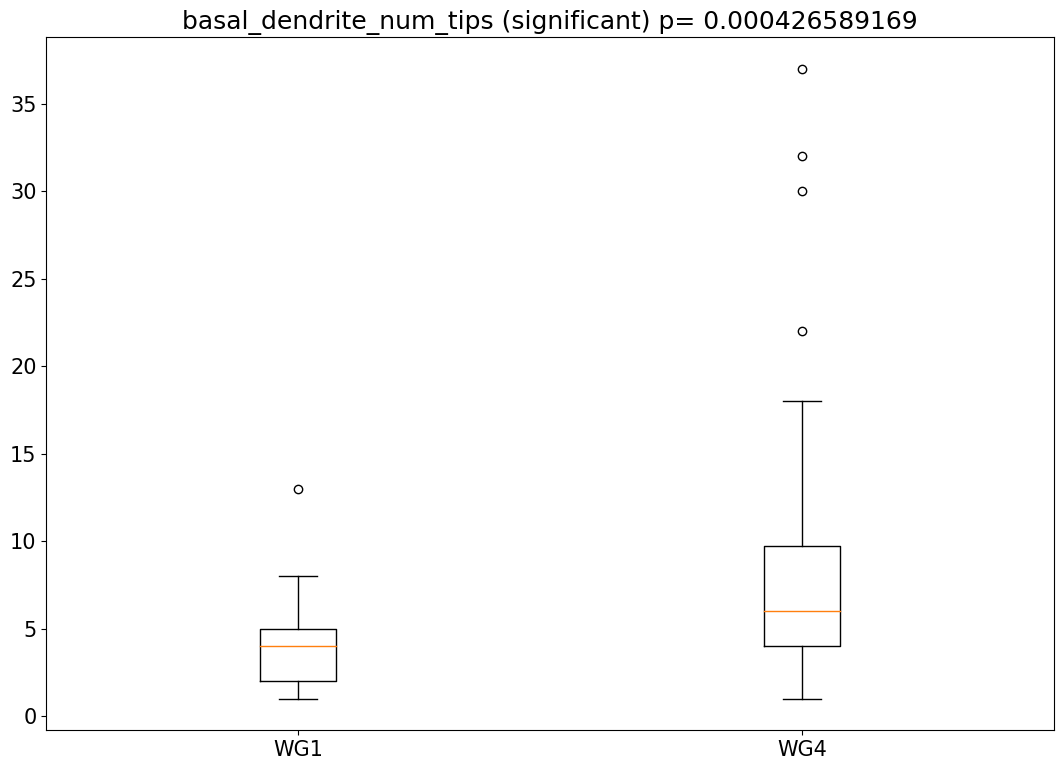

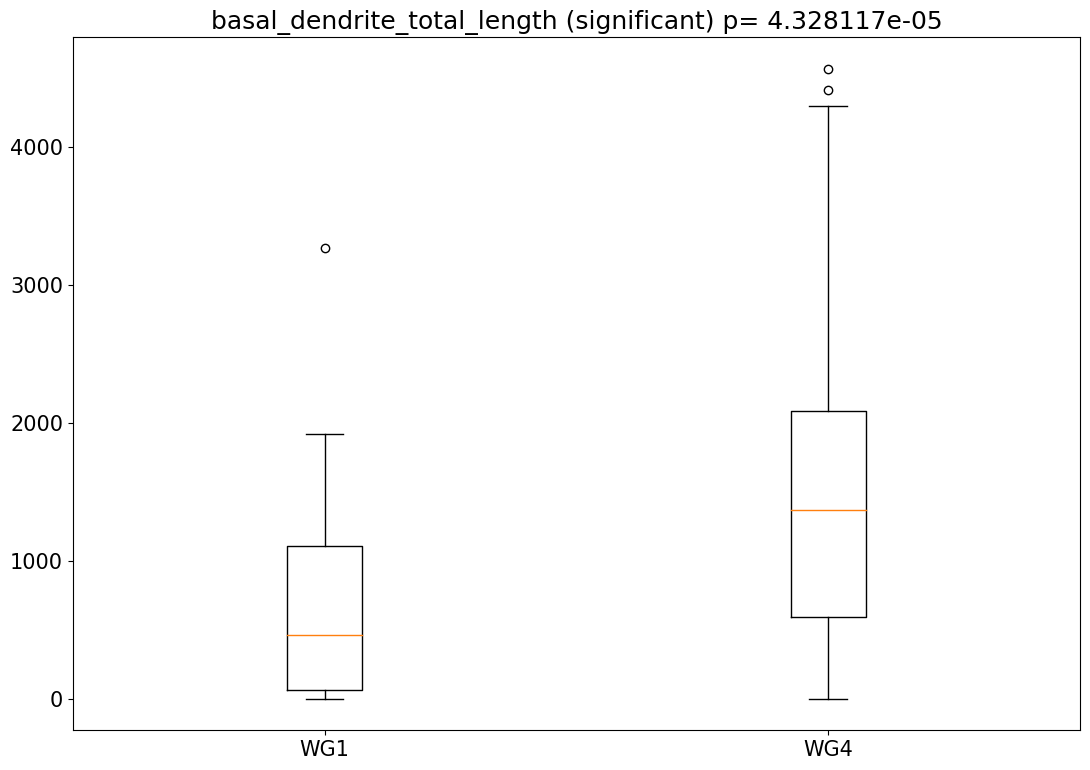

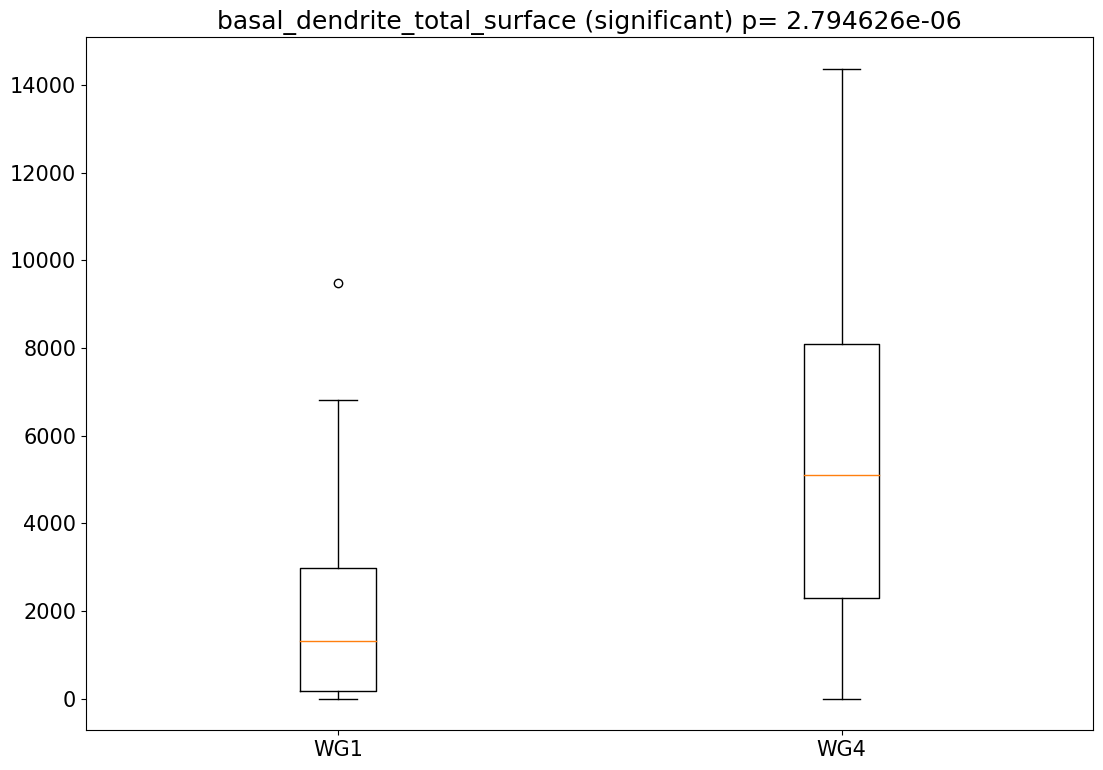

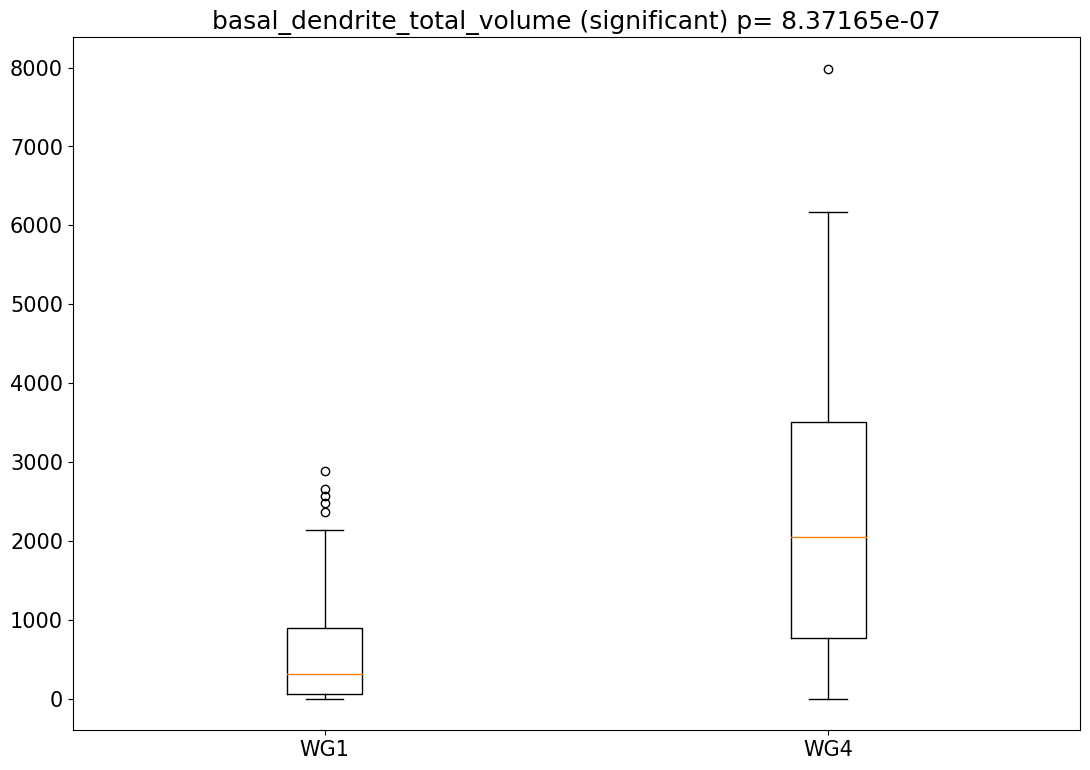

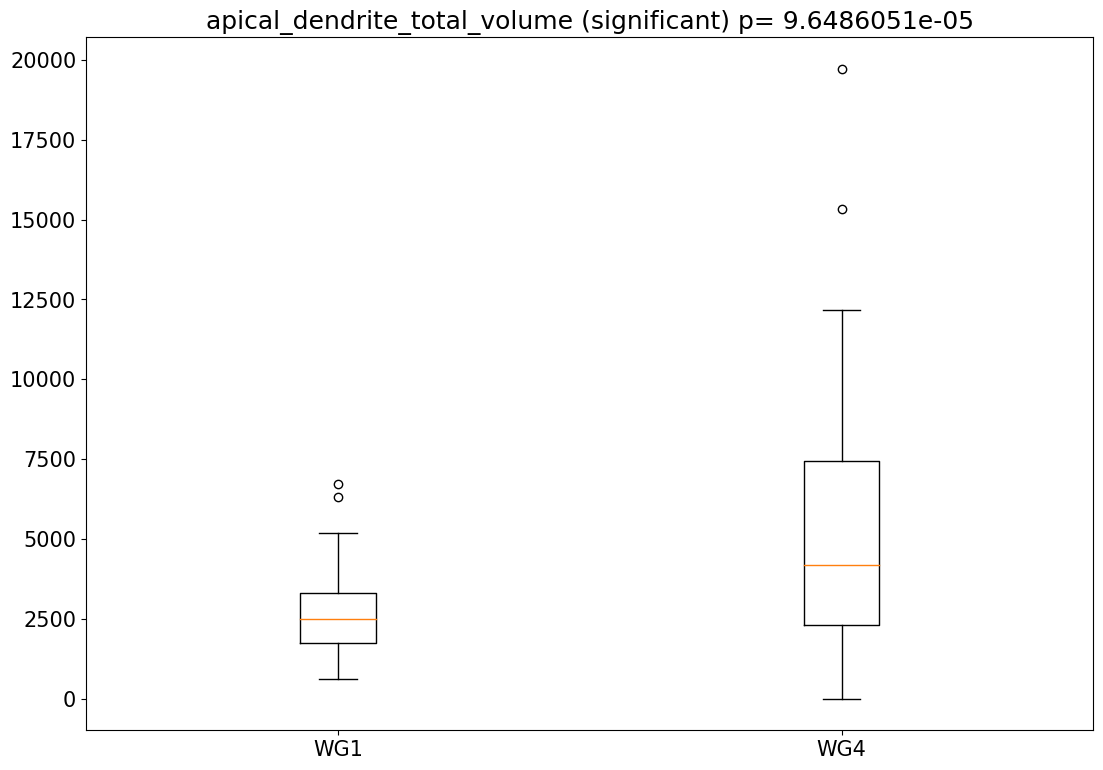

In [19]:

for i in np.arange(n_features):
    # take only the indexes of the cell_type specific elements
    wg1=np.zeros(1)
    wg4=np.zeros(1)
    wg1=all_features_new[np.where(cell_type_14==1),i]
    wg4=all_features_new[np.where(cell_type_14==4),i]
    # do the stat test and save the results
    d,p=stats.mannwhitneyu(wg1[0],wg4[0])

    if p<alpha_level/n_features:
        fig, ax = plt.subplots()
        labels=['WG1','WG4']
        plt.boxplot([np.transpose(wg1).flatten(),np.transpose(wg4).flatten()])
        plt.title(feature_names[i]+str(' (significant)') +str(' p= ') +str(np.round(p,12)))
#    else:
#        plt.title(feature_names[i]+str(' (non-significant)') +str(' p= ') +str(np.round(p,12)))
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xticks(np.arange(1, len(labels) + 1))
        ax.set_xticklabels(labels)


# Split between patients

In [20]:

print('WG1 patients')
print(len(wg1[0]))

print('WG4 patients')
print(len(wg4[0]))


WG1 patients
52
WG4 patients
50


# Show features leading separation

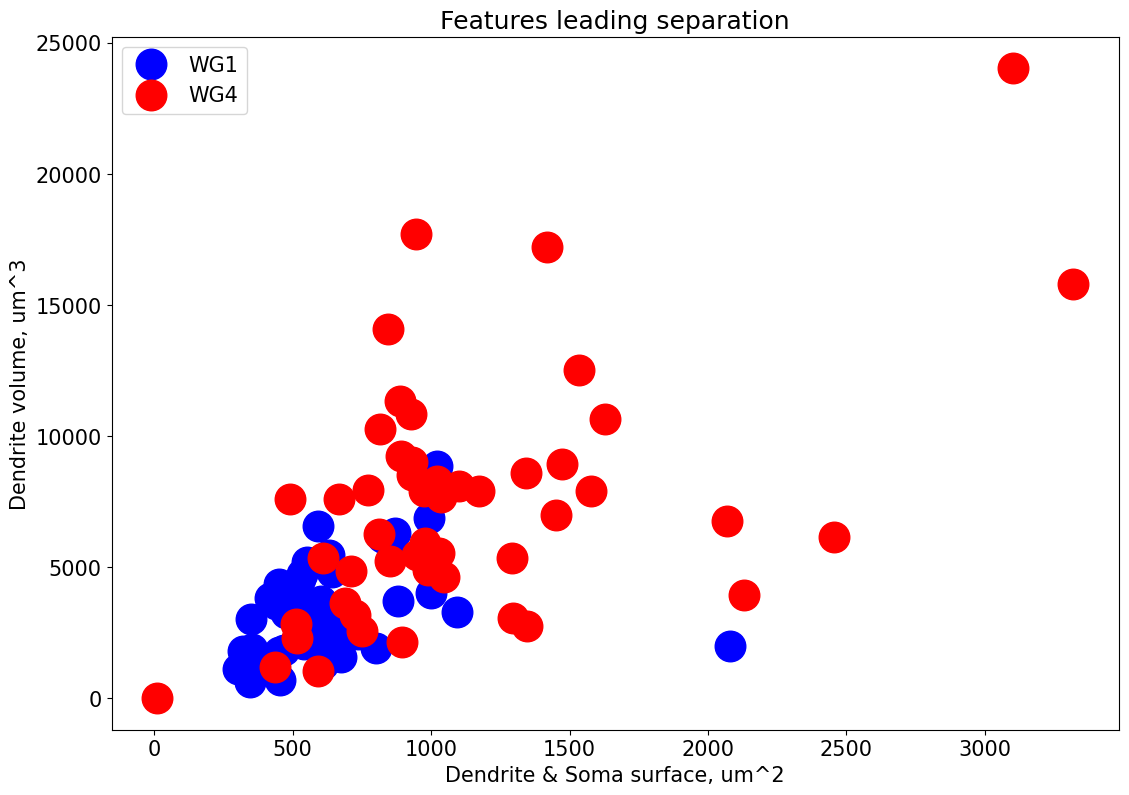

In [21]:

# find 
surface_idx=feature_names.index('dendrite_soma_surface')
volume_idx= feature_names.index('dendrite_total_volume')


# find indexes of WG1 and WG4 cells
wg1_idx=np.where(cell_type_14 == 1)[0]
wg4_idx=np.where(cell_type_14 == 4)[0]


# surface area
x_f_wg1 = all_features_new[wg1_idx,surface_idx]
y_f_wg1 = all_features_new[wg1_idx,volume_idx]
#z_f_wg1 = all_features_matrix_no_nan[wg1_idx,18]

# volume
x_f_wg4 = all_features_new[wg4_idx,surface_idx]
y_f_wg4 = all_features_new[wg4_idx,volume_idx]
#z_f_wg4 = all_features_matrix_no_nan[wg4_idx,18]


# plot the results
plt.plot(x_f_wg1,y_f_wg1,'.',c='blue', markersize=44)
plt.plot(x_f_wg4,y_f_wg4,'.',c='red', markersize=44)
plt.xlabel('Dendrite & Soma surface, um^2')
plt.ylabel('Dendrite volume, um^3')
plt.title('Features leading separation')
plt.legend(('WG1','WG4'))

# save figure
#plt.savefig('morpho_features_2D.pdf',format = 'pdf')



First 10 p_values:49 features
[5.31925564e-04 6.12169744e-03 1.39936983e-01 8.19646340e-01
 2.89187506e-04 3.46313000e-04 1.21697570e-02 7.00308045e-01
 6.36079163e-03 3.09406040e-03]




Text(0.5, 1.0, '-log10(P) Mann-Whithey (unsorted: WG1 vs WG4)')

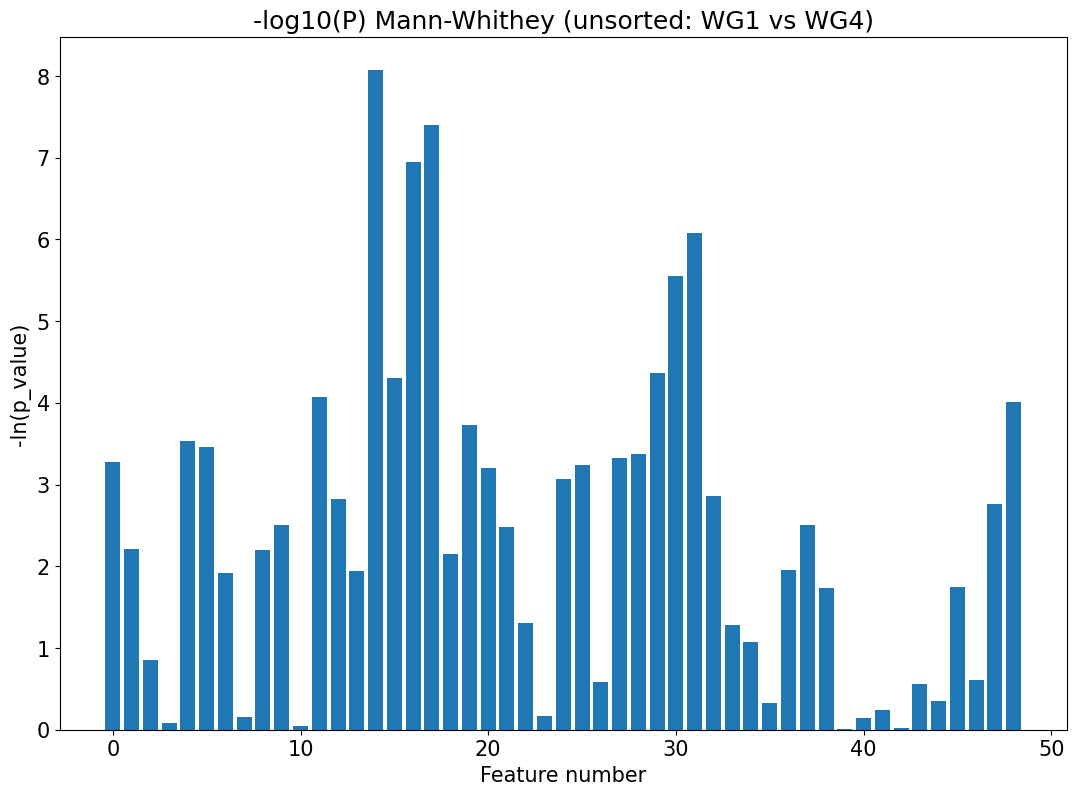

In [22]:
# PLOT p-values as a bar plot

# p-values order is different from all other features

print('First 10 p_values:' +str(len(p_values)) +str(' features'))
print(p_values[0:10])
print('\n')

# significance level
p_level=alpha_level/n_features
sign_level=np.zeros(n_features)
sign_level[:]=-np.log10(p_level)
log_p=-np.log10(p_values) # initial log_p


plt.bar(np.arange(0,n_features,1),log_p)
plt.ylabel('-ln(p_value)')
plt.xlabel('Feature number')
#plt.ylim(ymax=8)
plt.title('-log10(P) Mann-Whithey (unsorted: WG1 vs WG4)')

# save figure to eps
#plt.savefig('all_morpho_features_MW_bonferoni.eps',format='eps',dpi=300)

# Plot 10 most significant features

Names of 10 important features:


dendrite_soma_surface
dendrite_total_volume
dendrite_total_surface
basal_dendrite_total_volume
basal_dendrite_total_surface
basal_dendrite_total_length
dendrite_total_length
dendrite_num_stems
apical_dendrite_total_volume


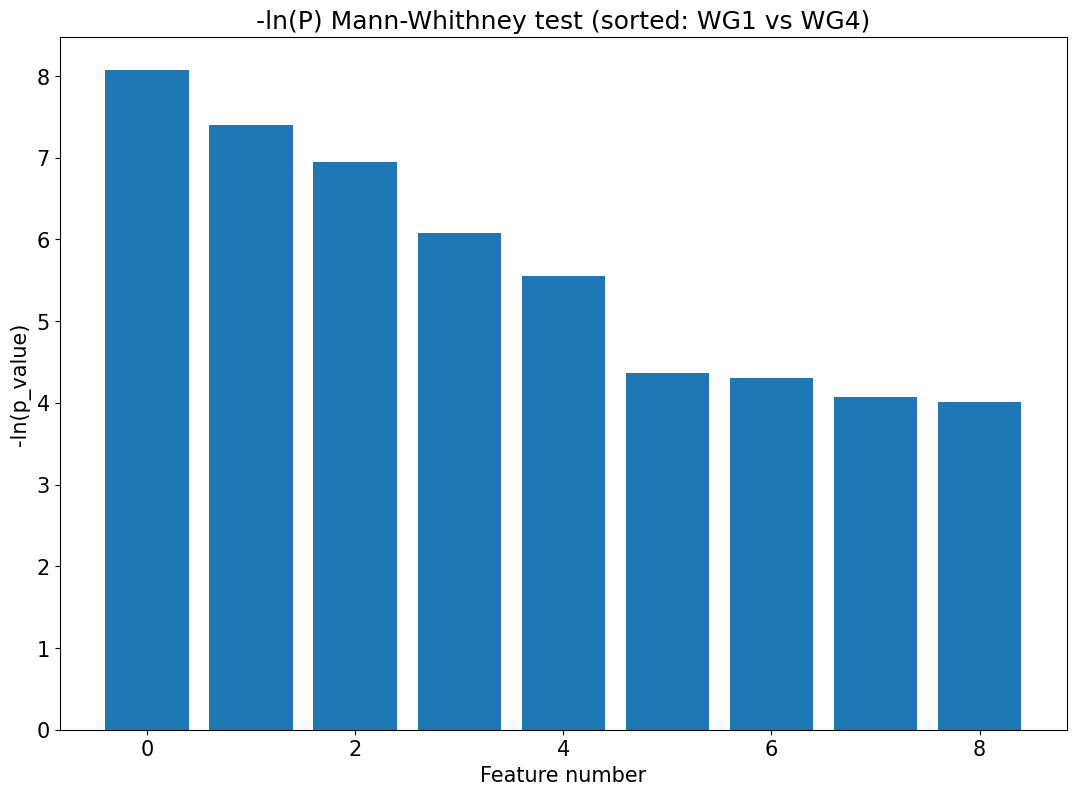

In [23]:
# significance level
p_level=0.05/n_features
sign_level=np.zeros(n_features)
sign_level[:]=-np.log10(p_level)
log_p=-np.log10(p_values) # initial log_p
# feature order
feature_order_idx=np.flip(np.argsort(-np.log10(p_values)),0)
feature_to_show=9


plt.bar(np.arange(0,feature_to_show,1),log_p[feature_order_idx[0:feature_to_show]])
plt.ylabel('-ln(p_value)')
plt.xlabel('Feature number')
plt.title('-ln(P) Mann-Whithney test (sorted: WG1 vs WG4)')

# show the feature order idx
print('Names of 10 important features:')
print('\n')
for i in range(feature_to_show):
    print(feature_names[feature_order_idx[i]])

# save figure to eps
#plt.savefig('all_morpho_features_KS_bonferoni_10most_significant.eps',format='eps',dpi=300)

# Scale the feature matrix

Data length
102


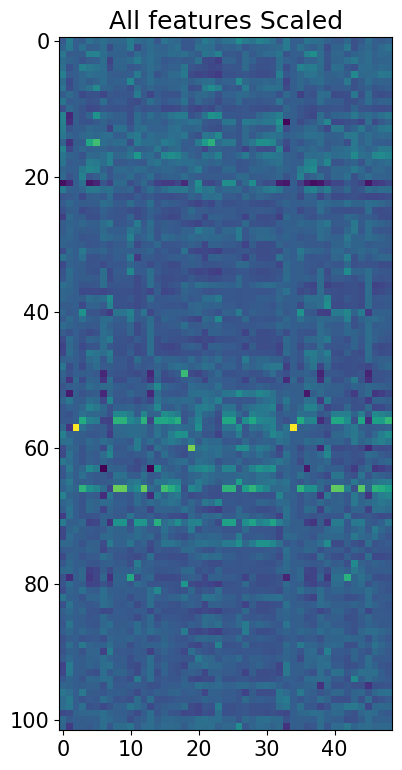

In [24]:
# Normalise all columns of the array
all_features_new_scaled = preprocessing.scale(all_features_new)

# show the normalised data
plt.imshow(all_features_new_scaled)
plt.title('All features Scaled')

# bring all elements to the same type
all_features_new_scaled.astype(float)

# show the length
print('Data length')
print(len(all_features_new_scaled))

# PCA on data WG1 vs WG1TS vs WG4

No handles with labels found to put in legend.


explained variance ratio (first two components): [0.31324032 0.13082417]


Text(0, 0.5, 'Principal component 2')

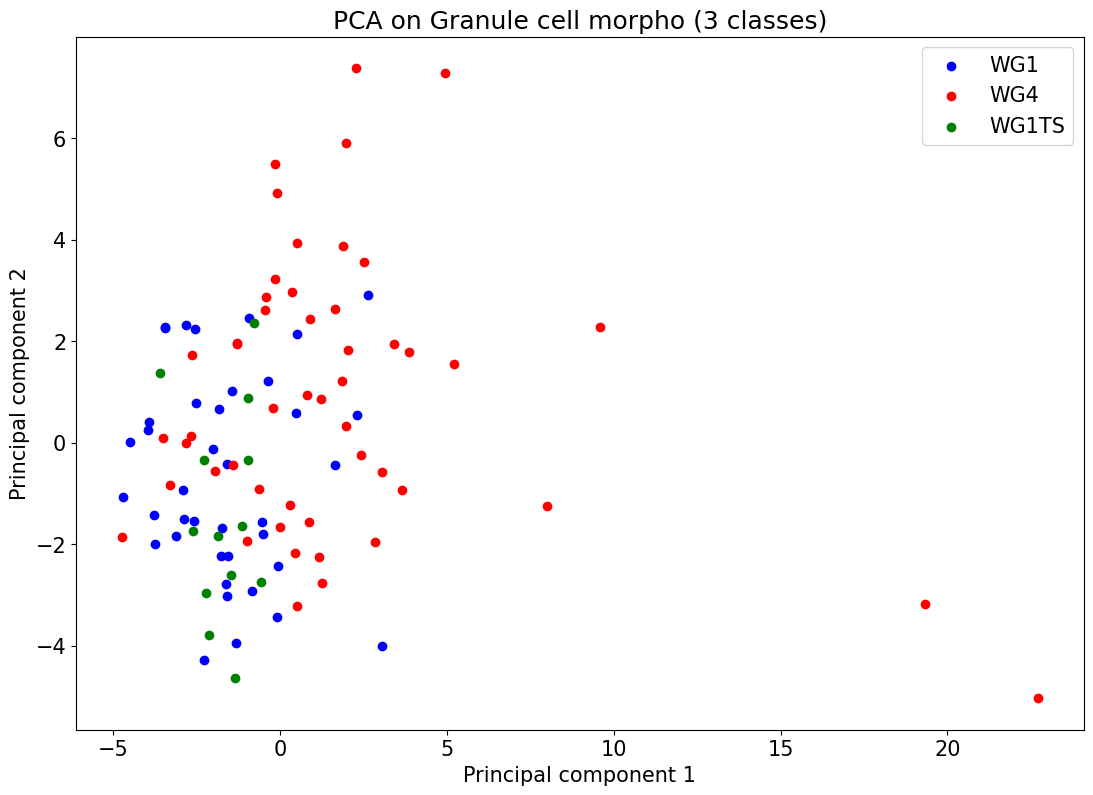

In [25]:

pca = PCA(n_components=2)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_new_scaled).transform(all_features_new_scaled)

# print the variance explained
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# create the colors vectors
#colors = np.heaviside(cell_type-2,1)

# all indexes of WG
wg1_idx=np.zeros(1)
wg4_idx=np.zeros(1)
wg1ts_idx=np.zeros(1)
wg1_idx=np.where(cell_type==1)
wg4_idx=np.where(cell_type==4)
wg1ts_idx=np.where(cell_type==11)

fig, ax = plt.subplots()

plt.scatter(X_r[wg1_idx, 0],X_r[wg1_idx, 1],c='blue')
plt.scatter(X_r[wg4_idx, 0],X_r[wg4_idx, 1],c='red')
plt.scatter(X_r[wg1ts_idx, 0],X_r[wg1ts_idx, 1],c='green')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA on Granule cell morpho (3 classes)')
plt.legend(['WG1','WG4','WG1TS'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')


# PCA on data WG1 vs WG4

No handles with labels found to put in legend.


explained variance ratio (first two components): [0.31324032 0.13082417]


Text(0, 0.5, 'Principal component 2')

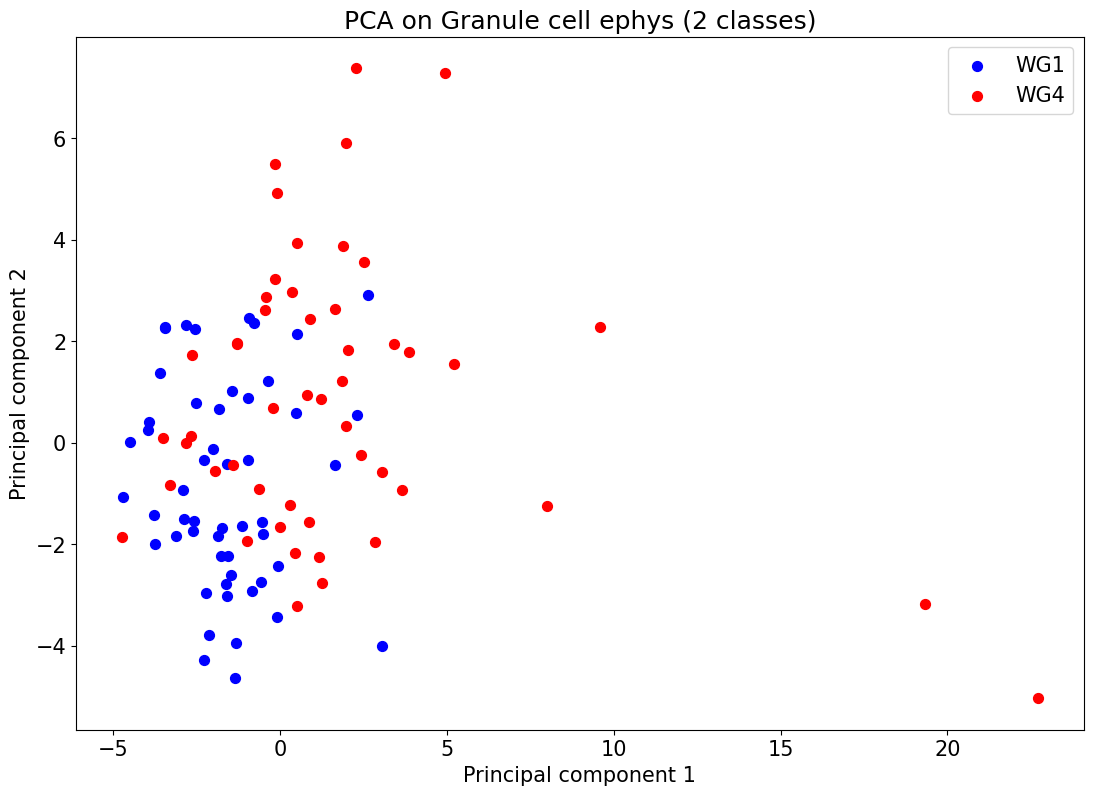

In [26]:

pca = PCA(n_components=2)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_new_scaled).transform(all_features_new_scaled)


# create the cell type with only 2 classes
cell_type_14=np.array(cell_type)
cell_type_14[np.where(cell_type_14 == 11)]=1

# print the variance explained
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# create the colors vectors
#colors = np.heaviside(cell_type-2,1)

# all indexes of WG
wg1_idx=np.zeros(1)
wg4_idx=np.zeros(1)
wg1_idx=np.where(cell_type_14==1)
wg4_idx=np.where(cell_type_14==4)

fig, ax = plt.subplots()

plt.scatter(X_r[wg1_idx, 0],X_r[wg1_idx, 1],c='blue',s=50)
plt.scatter(X_r[wg4_idx, 0],X_r[wg4_idx, 1],c='red',s=50)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA on Granule cell ephys (2 classes)')
plt.legend(['WG1','WG4'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# save figure
#plt.savefig('PCA_WG1WG1TS_WG4.eps', format='eps', dpi=300)

# Do the PCA on all data features and show the output

Text(0.5, 1.0, 'All features in PCA-space')

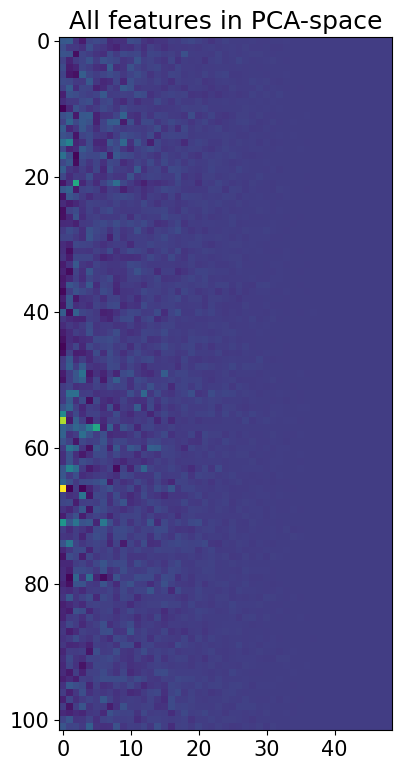

In [27]:

pca = PCA(n_components=n_features)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_new_scaled).transform(all_features_new_scaled)

# show all features projected in the PCA space

plt.imshow(X_r)
plt.title('All features in PCA-space')


# Original features weight after random forest classification, WG1 vs WG4

Random forest classification score: 1.0


Random forest classification performance: 0.7450980392156863
2 classes
Sum of feature importances: 1.0
Order of features
[14 16 17 31  4 48 30 15  1 19 32  0 18 13 29 28 47  5 33  2 38  6 36 34
 25 12 37 45 24 11  9 46 22 39 23  8  7 27 43 35 10 41 21 44 42 40 26  3
 20]


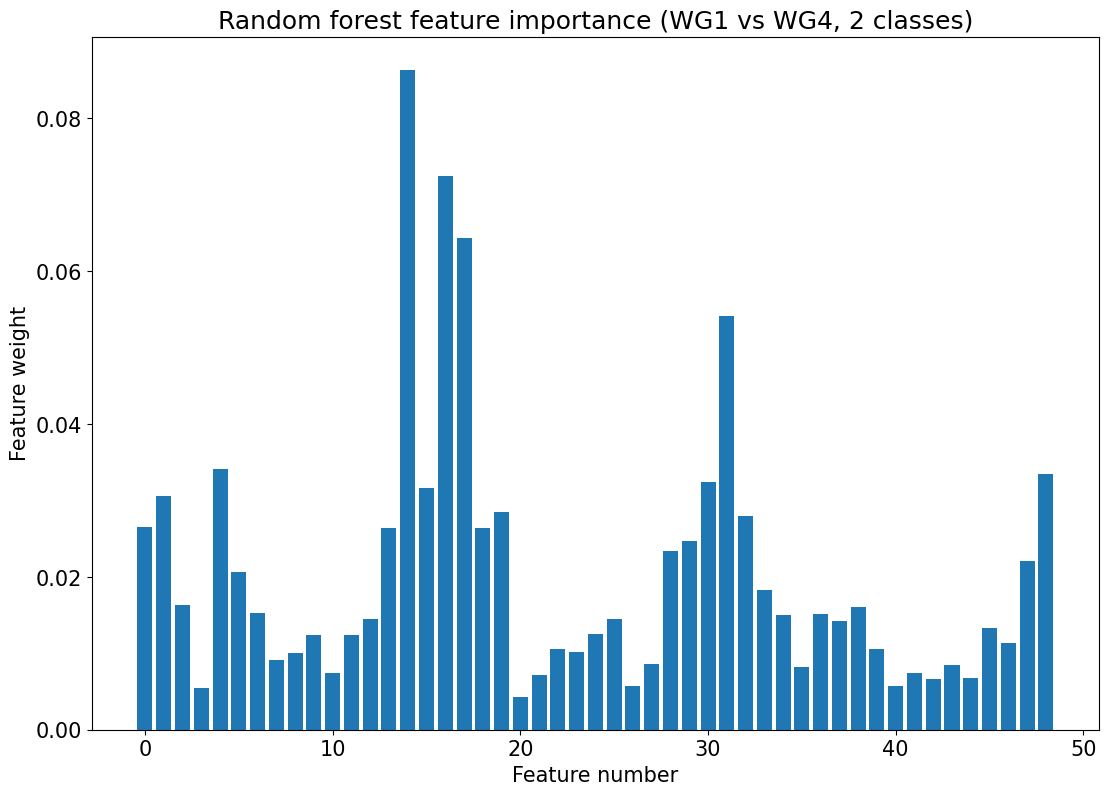

In [28]:
# do random forest classifier on original data

# CELL_TYPES FOR WG1+WG1TS, WG4

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

#RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(all_features_new_scaled, cell_type_14)

# get the scores of the trees and pring them
scores = clf.score(all_features_new_scaled, cell_type_14)
print('Random forest classification score: ' + str(scores))

oob_error = clf.oob_score_
print('\n')
print('Random forest classification performance: ' + str(oob_error))

print('2 classes')
feature_importance=clf.feature_importances_

# [np.flip(np.argsort(feature_importance),0)]
plt.bar(np.arange(0,n_features,1), feature_importance)


plt.title('Random forest feature importance (WG1 vs WG4, 2 classes)')
plt.xlabel('Feature number')
plt.ylabel('Feature weight')

#plt.xticks(np.arange(0,n_features,1),np.flip(np.argsort(feature_importance),0))

print('Sum of feature importances: ' + str(np.sum(clf.feature_importances_)))

print('Order of features')
print(np.flip(np.argsort(feature_importance),0))

#plt.savefig('Random_forest_WG1WG1TS_WG4_weights.eps', format='eps', dpi=300)

# Show 10 most important features from random forest classifier

Names of the important features:


dendrite_soma_surface
dendrite_total_surface
dendrite_total_volume
basal_dendrite_total_volume
dendrite_max_euclidean_distance
apical_dendrite_total_volume
basal_dendrite_total_surface
dendrite_total_length
dendrite_contraction


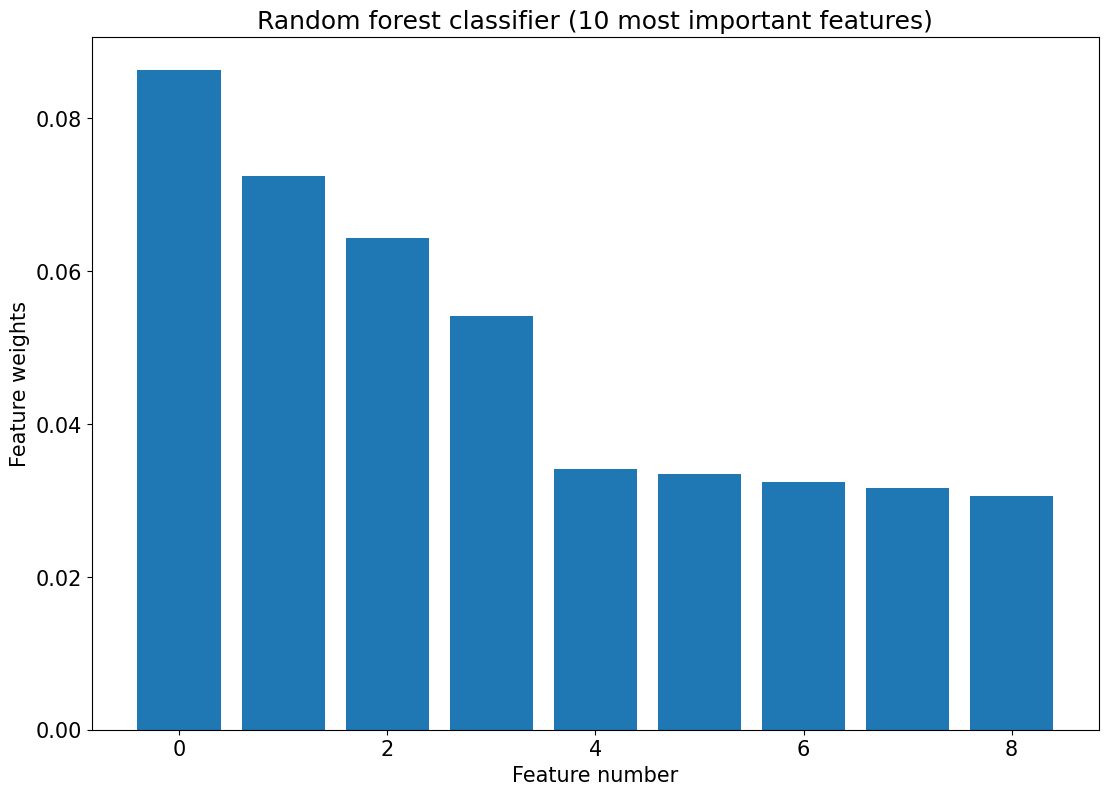

In [29]:

# feature order
feature_order_idx=np.flip(np.argsort(feature_importance),0)
feature_to_show=9


plt.bar(np.arange(0,feature_to_show,1),feature_importance[feature_order_idx[0:feature_to_show]])
plt.ylabel('Feature weights')
plt.xlabel('Feature number')
plt.title('Random forest classifier (10 most important features)')

# show the feature order idx
print('Names of the important features:')
print('\n')
for i in range(feature_to_show):
    print(feature_names[feature_order_idx[i]])

# save figure to eps
#plt.savefig('all_morpho_features_random_forest_10_largest.eps',format='eps',dpi=300)

# predict the WG using 6 case classifier

In [30]:

# the function to predict the WG of the 7th patient based on 6 patients
# returns the probability to be WG1 for the particular patient
# This function trains the random forest classifier based on 6 cases and predicts the 7th one

def check_the_case(case_name,case_number,patient_label,all_features_new_scaled,cell_type_14):

    # exclude the 8th case
    patient_label_6=patient_label[np.where(patient_label<8)[0]]

    six_cases_idx=np.where(patient_label_6!=case_number)[0]
    current_case_idx=np.where(patient_label_6==case_number)[0]

    all_features_new_scaled_6cases = all_features_new_scaled[six_cases_idx,:]

    # define the cell type label for 6 cases
    cell_type_6cases = cell_type_14[six_cases_idx]
    
    # print the number of cells per case
    print('Number of cells ' + 'in ' + case_name)
    print(len(current_case_idx))


    # process the cell type: WG1TS -> WG1 conversion
    cell_type_14=np.array(cell_type_6cases)

    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                min_impurity_decrease=0.0, 
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
                oob_score=True, random_state=0, verbose=0, warm_start=False)

    #RandomForestClassifier(max_depth=None, random_state=0)
    clf.fit(all_features_new_scaled_6cases, cell_type_6cases)

    # get the scores of the trees and pring them
    scores = clf.score(all_features_new_scaled_6cases, cell_type_6cases)
    print('Random forest classification score: ' + str(scores))


    oob_error = clf.oob_score_
    print('\n')
    print('Random forest oob classification performance: ' + str(oob_error))

    print('2 classes')
    feature_importance=clf.feature_importances_

    plt.bar(np.arange(0,n_features,1), feature_importance)


    plt.title('Random forest feature importance based on GCs')
    plt.xlabel('Feature number')
    plt.ylabel('Feature weight')


    seven_case_idx=np.where(patient_label_6==case_number)[0]


    seven_case_data=all_features_new_scaled[seven_case_idx,:]

    result=clf.predict(seven_case_data)

    n_wg1=len(np.where(result == 1)[0])
    n_wg4=len(np.where(result == 4)[0])
    
    # probability of WG1 case
    prob=float(n_wg1)/float((n_wg1+n_wg4))
    
    if prob<0.5:
        print('Probaility that ' + str(case_name) + ' cells is WG4')
        print(1-prob)
    elif prob>=0.5:
        print('Probaility that ' + str(case_name) + ' cells is WG1')
        print(prob)
    
    return float(n_wg1)/float((n_wg1+n_wg4))



# H16.06.008 (WG1)

Number of cells in H16.06.008
2
Random forest classification score: 1.0


Random forest oob classification performance: 0.79
2 classes
Probaility that H16.06.008 cells is WG4
1.0


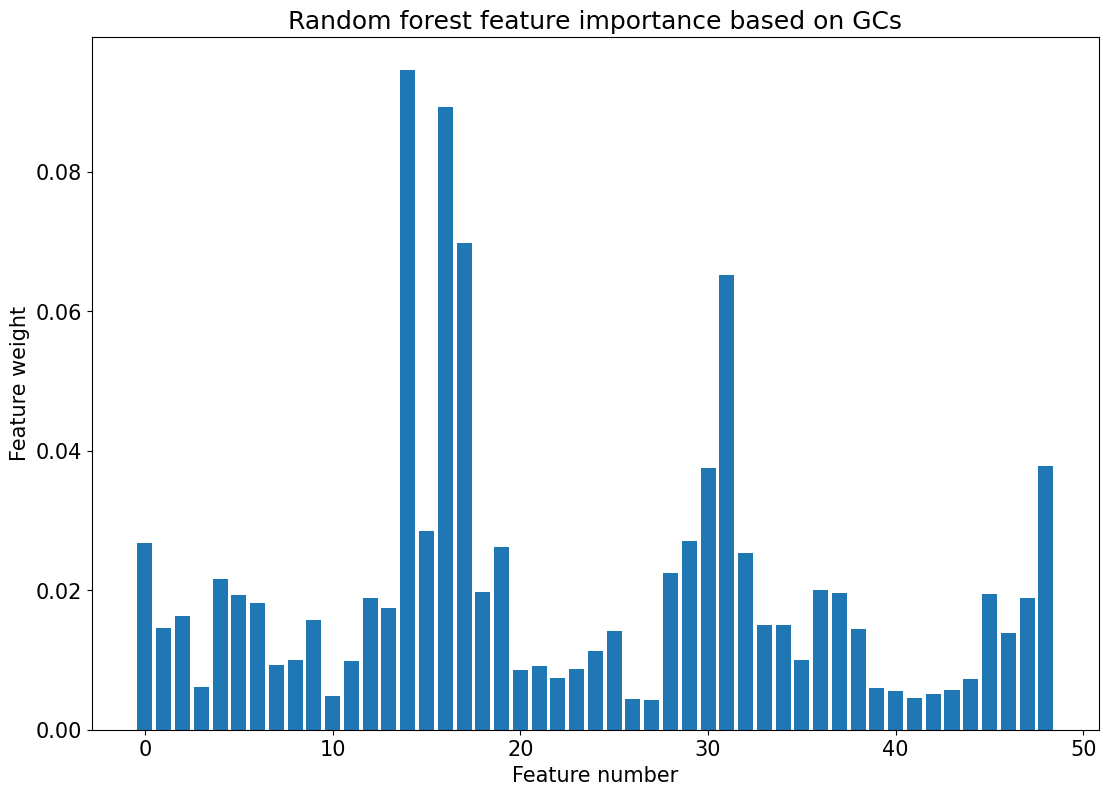

In [31]:
case_name='H16.06.008'
case_number=1

wg1_prob=check_the_case(case_name,case_number,patient_label,all_features_new_scaled,cell_type_14)

# H16.06.013 (WG4)

Number of cells in H16.06.013
14
Random forest classification score: 1.0


Random forest oob classification performance: 0.7727272727272727
2 classes
Probaility that H16.06.013 cells is WG4
0.5714285714285714


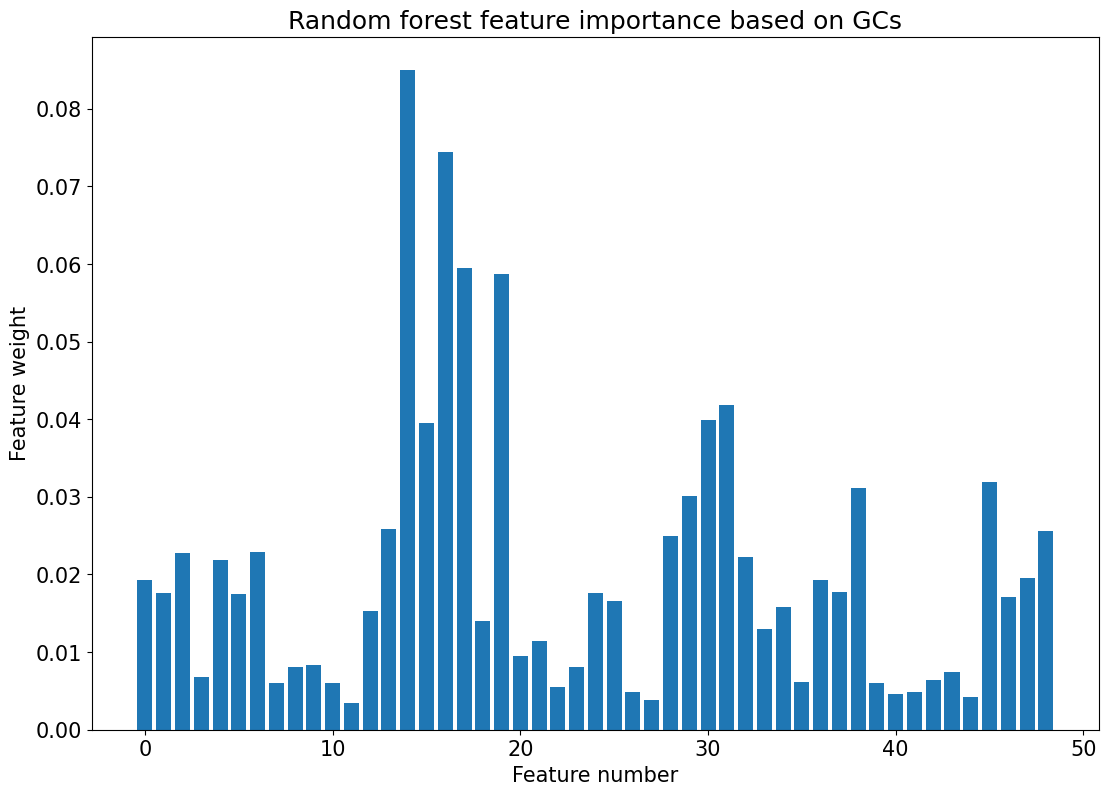

In [32]:
case_name='H16.06.013'
case_number=2

wg1_prob=check_the_case(case_name,case_number,patient_label,all_features_new_scaled,cell_type_14)

# H17.06.012 (WG4)

Number of cells in H17.06.012
15
Random forest classification score: 1.0


Random forest oob classification performance: 0.7586206896551724
2 classes
Probaility that H17.06.012 cells is WG1
0.6


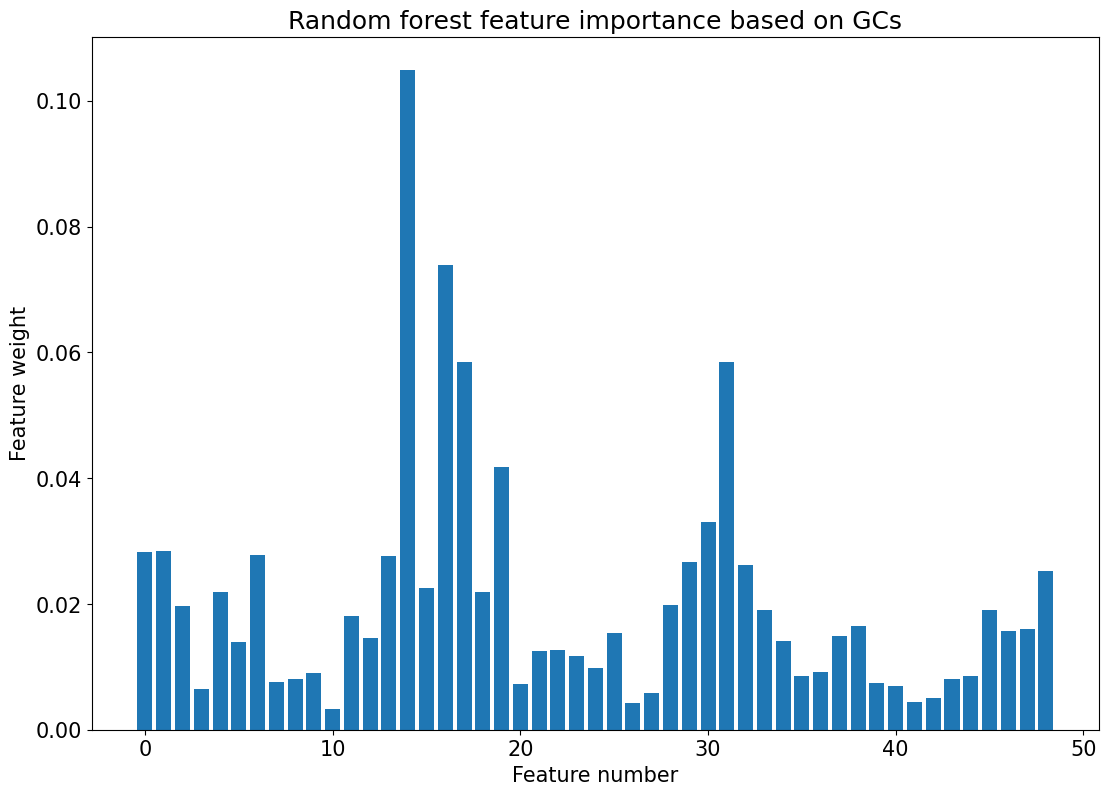

In [33]:
case_name='H17.06.012'
case_number=3

wg1_prob=check_the_case(case_name,case_number,patient_label,all_features_new_scaled,cell_type_14)

# H17.06.014 (WG1)

Number of cells in H17.06.014
13
Random forest classification score: 1.0


Random forest oob classification performance: 0.7640449438202247
2 classes
Probaility that H17.06.014 cells is WG1
0.9230769230769231


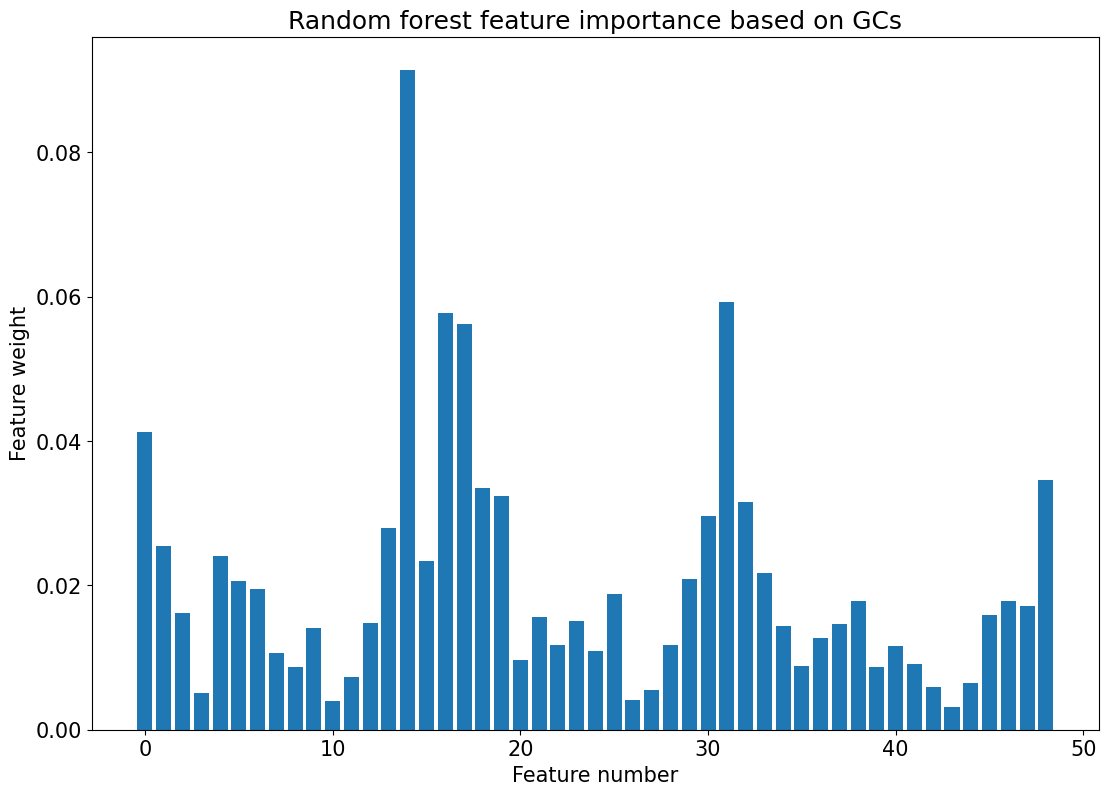

In [34]:
case_name='H17.06.014'
case_number=4

wg1_prob=check_the_case(case_name,case_number,patient_label,all_features_new_scaled,cell_type_14)

# H17.06.015 (WG1)

Number of cells in H17.06.015
13
Random forest classification score: 1.0


Random forest oob classification performance: 0.7415730337078652
2 classes
Probaility that H17.06.015 cells is WG4
0.5384615384615384


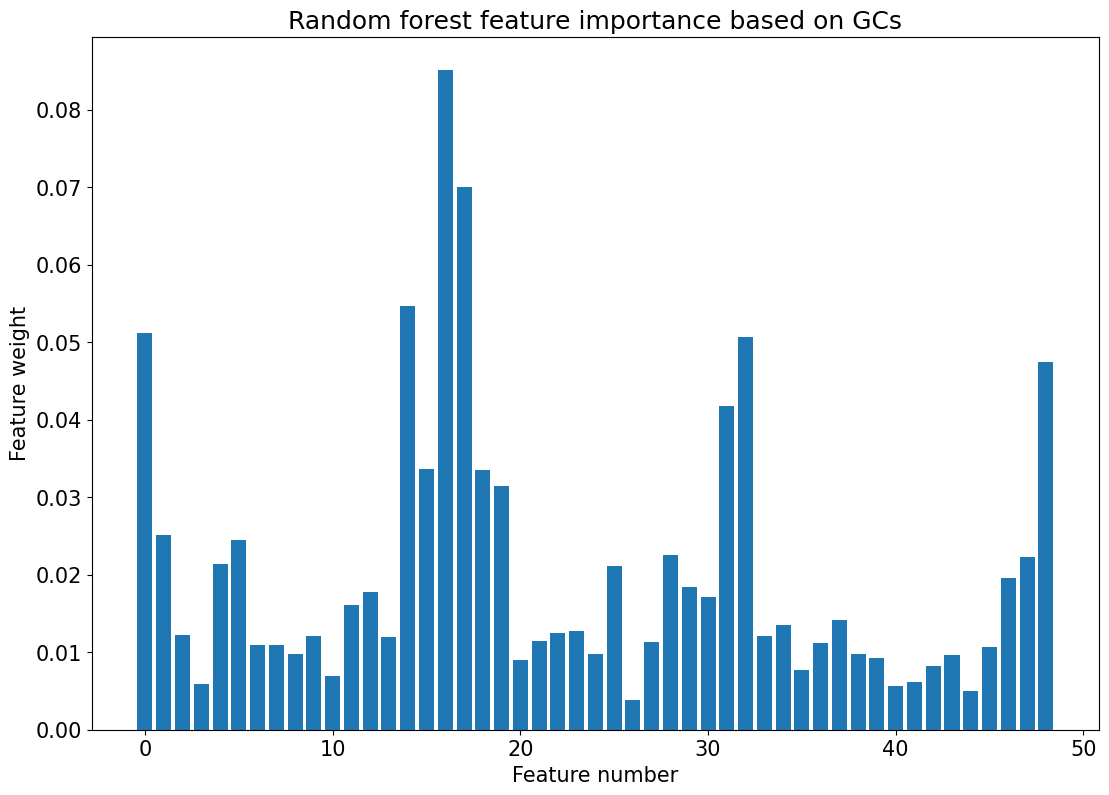

In [35]:
case_name='H17.06.015'
case_number=5

wg1_prob=check_the_case(case_name,case_number,patient_label,all_features_new_scaled,cell_type_14)

# H18.06.366 (WG1)

Number of cells in H18.06.366
21
Random forest classification score: 1.0


Random forest oob classification performance: 0.8271604938271605
2 classes
Probaility that H18.06.366 cells is WG1
0.5238095238095238


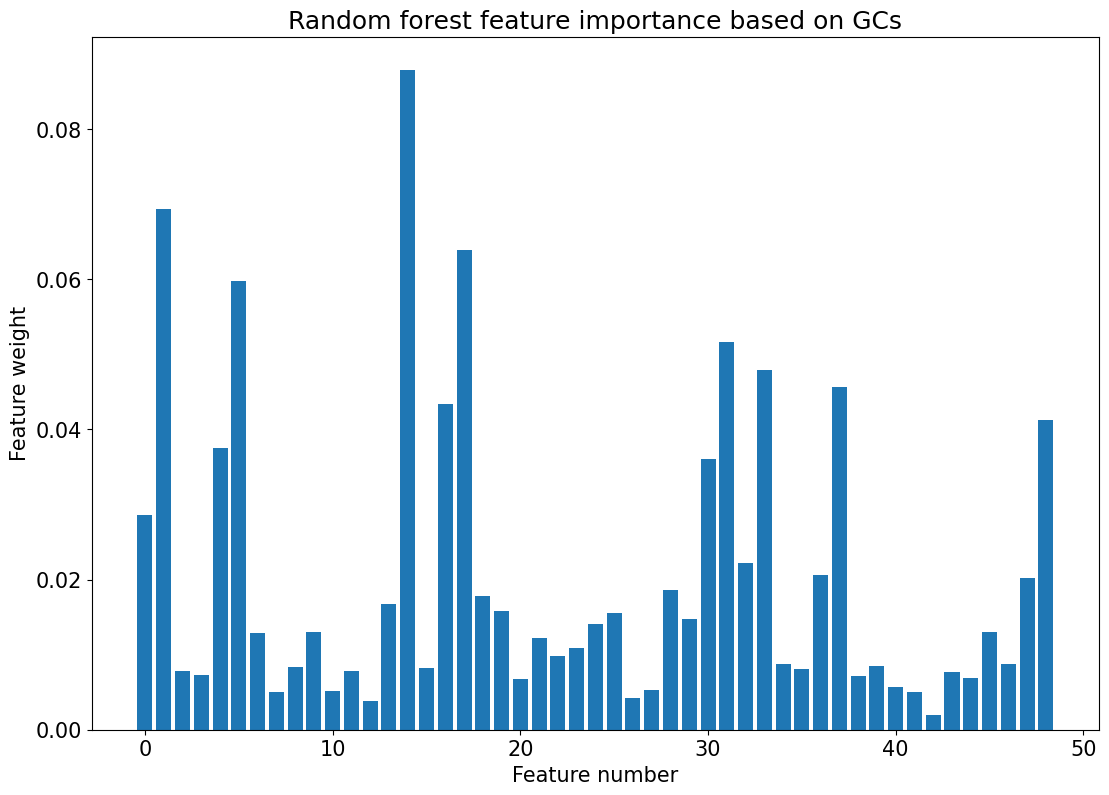

In [36]:
case_name='H18.06.366'
case_number=6

wg1_prob=check_the_case(case_name,case_number,patient_label,all_features_new_scaled,cell_type_14)

# H18.06.368 (WG4)

Number of cells in H18.06.368
24
Random forest classification score: 1.0


Random forest oob classification performance: 0.8205128205128205
2 classes
Probaility that H18.06.368 cells is WG1
0.5416666666666666


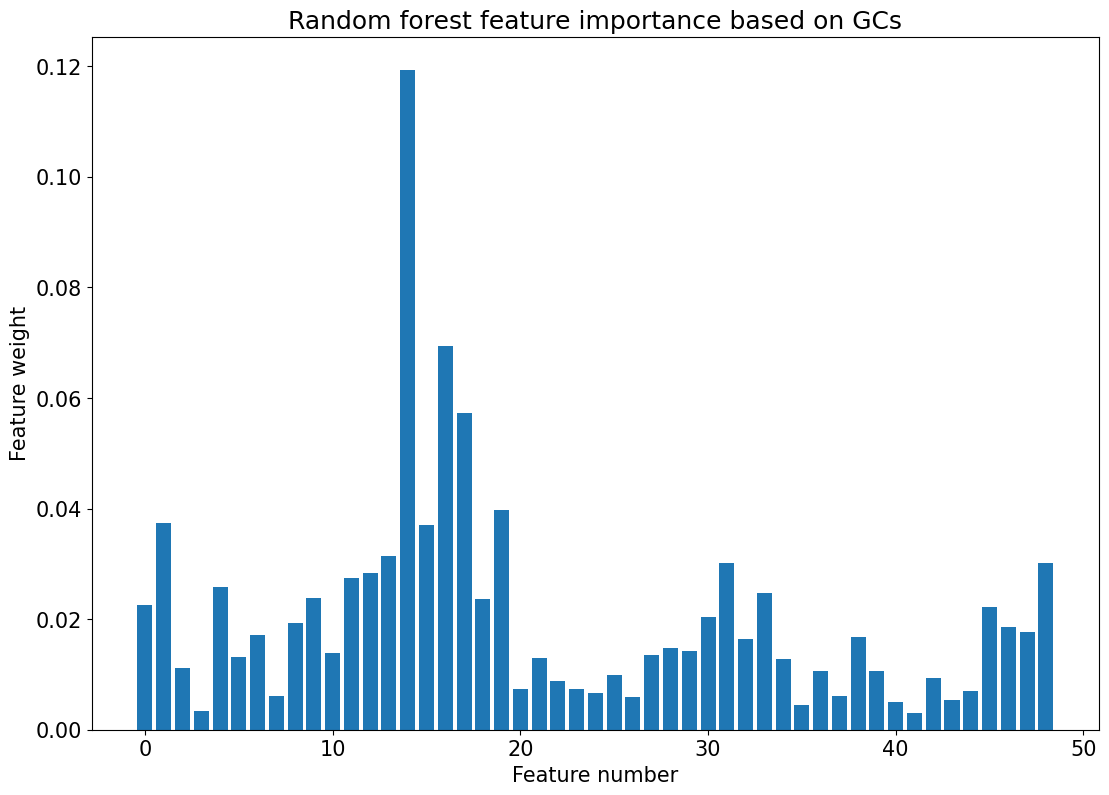

In [37]:
case_name='H18.06.368'
case_number=7

wg1_prob=check_the_case(case_name,case_number,patient_label,all_features_new_scaled,cell_type_14)

# Running tSNE on the original morpho feature set

Ephys dataset, perplexity=30 in 1.6 sec


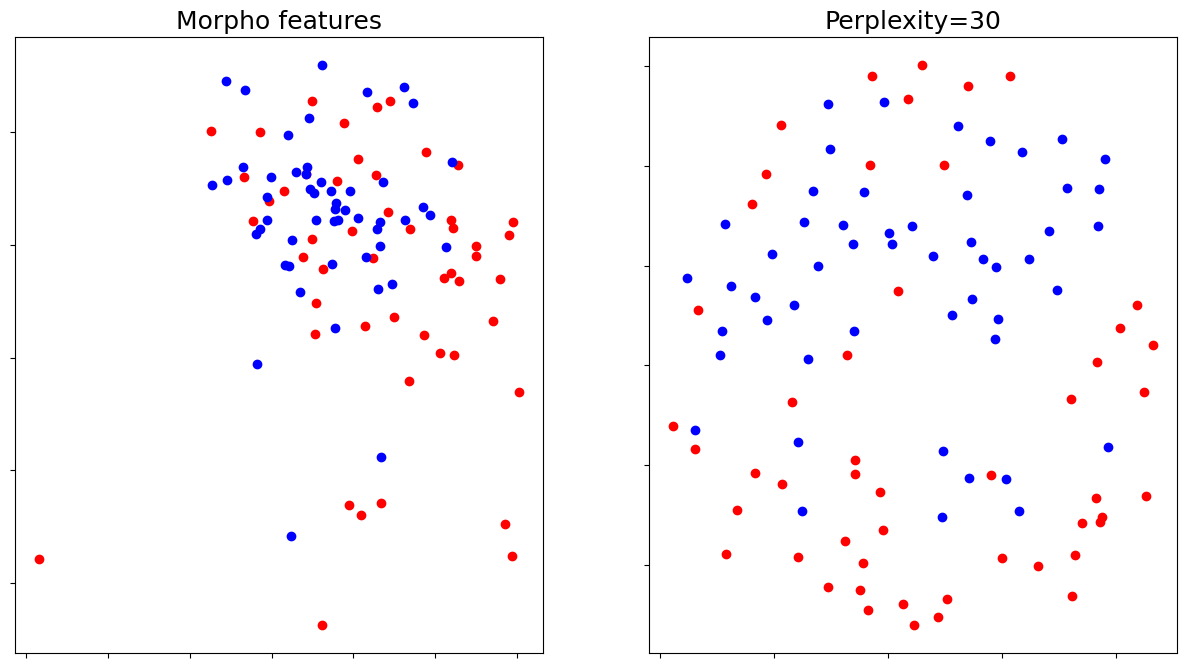

In [38]:



perplexities = [ 30]
(fig, subplots) = plt.subplots(1, len(perplexities)+1, figsize=(15, 8))

X = all_features_new_scaled[:,:]
y = cell_type_14

red = y == 4
blue = y == 1

n_samples=len(X)
n_components = 2

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[blue, 0], X[blue, 1], c="b")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
ax.set_title('Morpho features')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, metric='cosine',n_iter=20000)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("Ephys dataset, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[blue, 0], Y[blue, 1], c="b")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

# Running tSNE on post-PCA ephys feature set

Morpho dataset, perplexity=40 in 0.4 sec


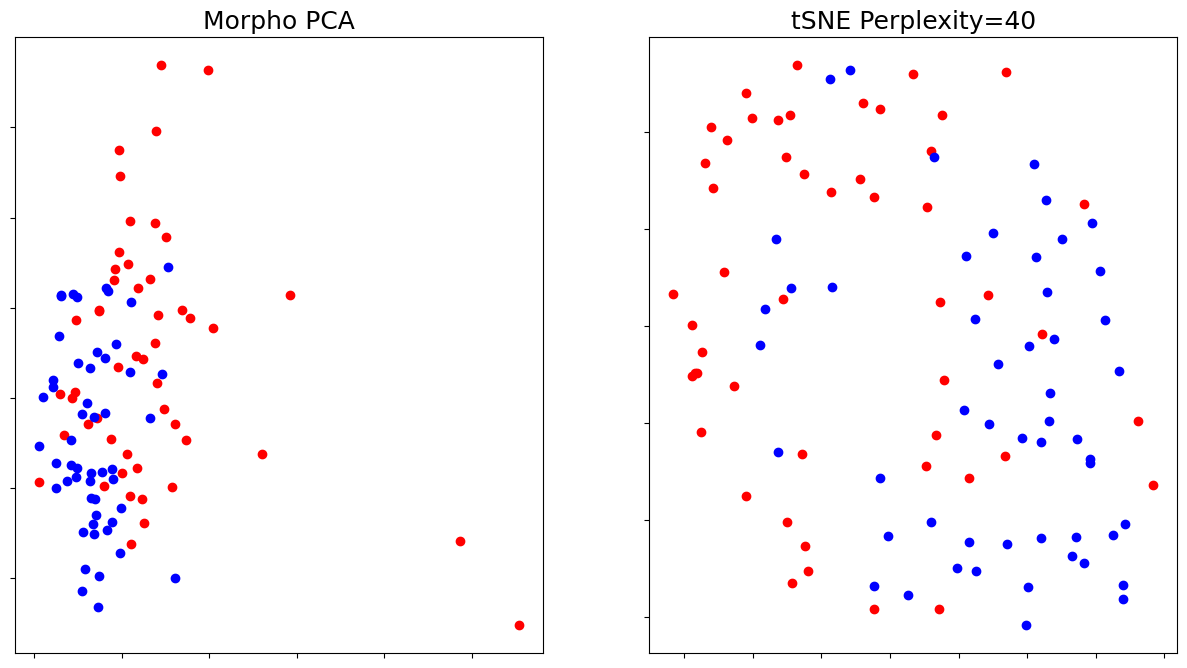

In [39]:

# Aiming to project to 2 componenets
n_components = 2

(fig, subplots) = plt.subplots(1, 2, figsize=(15, 8))
perplexities = [40]


X = X_r[:,:]
y = cell_type_14

red = y == 4
blue = y == 1

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[blue, 0], X[blue, 1], c="b")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
ax.set_title('Morpho PCA')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, metric='cosine',n_iter=20000)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("Morpho dataset, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title(str('tSNE ' ) +"Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[blue, 0], Y[blue, 1], c="b")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

    
#plt.savefig('tSNE_perplexity_30.eps', format='eps', dpi=300)


# Random forest after tSNE: tSNE1 and tSNE2

Classifier performance, tSNE1 and tSNE2: 0.803921568627451
RandomForest with 200 estimators with features [0, 1] has a score of 1.0


Text(0, 0.5, 'Principal component 2')

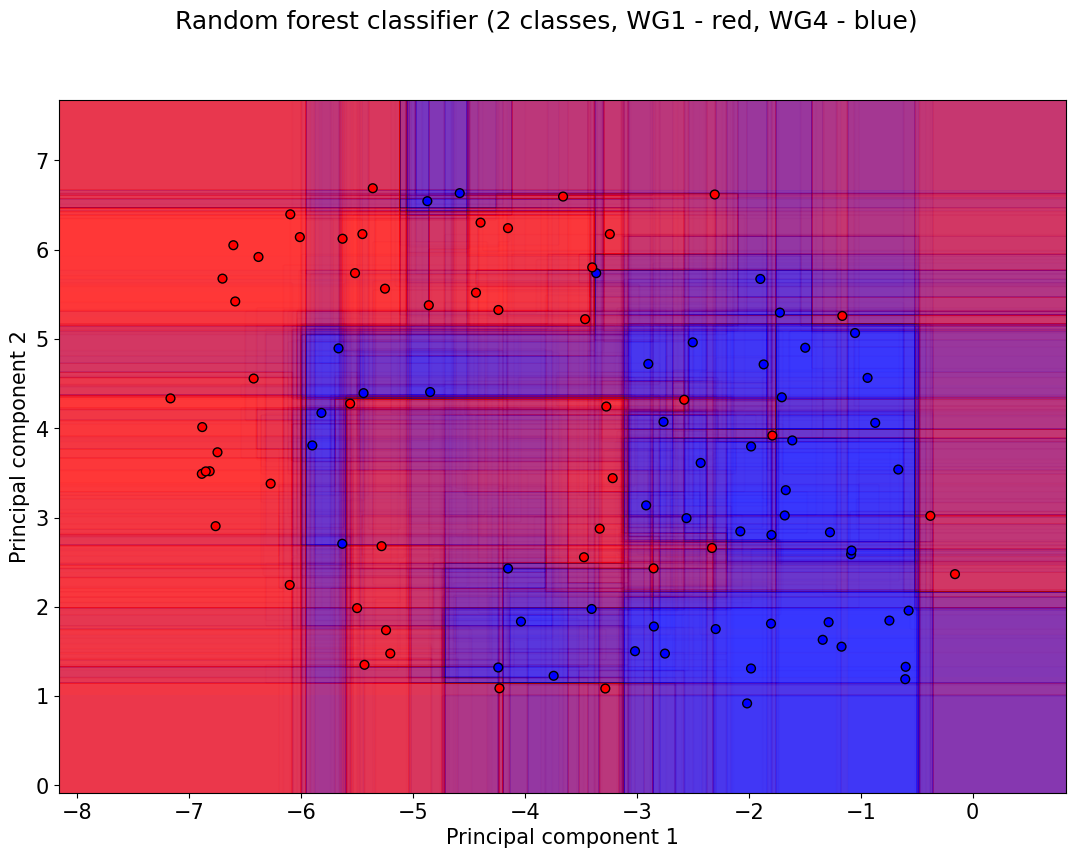

In [40]:
# Plot the decision boundary only for Random forest classifier


# Parameters
n_classes = 2
n_estimators = 200
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration


model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=n_estimators, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)                    


pair=[0,1]

#X = X_r[:, pair]
X = Y
y = cell_type_14



# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Train
clf = clone(model)
clf = model.fit(X, y)

# get the scores of the trees
scores = clf.score(X, y)

# print the model score
print('Classifier performance, tSNE1 and tSNE2: ' + str(clf.oob_score_))

# Create a title for each column and the console by using str() and
# slicing away useless parts of the string
model_title = str(type(model)).split(
    ".")[-1][:-2][:-len("Classifier")]

model_details = model_title
if hasattr(model, "estimators_"):
    model_details += " with {} estimators".format(
        len(model.estimators_))
print(model_details + " with features", pair,
      "has a score of", scores)


# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Plot either a single DecisionTreeClassifier or alpha blend the
# decision surfaces of the ensemble of classifiers
if isinstance(model, DecisionTreeClassifier):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
else:
    # Choose alpha blend level with respect to the number
    # of estimators
    # that are in use (noting that AdaBoost can use fewer estimators
    # than its maximum if it achieves a good enough fit early on)
    estimator_alpha = 1.0 / len(model.estimators_)
    for tree in model.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=ListedColormap(['b','r']))

# Build a coarser grid to plot a set of ensemble classifications
# to show how these are different to what we see in the decision
# surfaces. These points are regularly space and do not have a
# black outline
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                 yy_coarser.ravel()]
                                 ).reshape(xx_coarser.shape)

plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['b','r']),
            edgecolor='k', s=40)

plt.suptitle("Random forest classifier (2 classes, WG1 - red, WG4 - blue)")
plt.axis("tight")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

#plt.savefig('Random_forest_visualisation.svg', format='svg', dpi=100)

# k-means clustering on the original ephys features: 2 clusters

n_clusters: 2, 	 n_samples 102, 	 n_features 49
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.27s	4015	0.042	0.174	0.067	0.008	0.054	0.552
random   	0.02s	4015	0.042	0.174	0.067	0.008	0.054	0.489
PCA-based	0.01s	4213	0.134	0.164	0.148	0.132	0.141	0.241
__________________________________________________________________________________


/var/folders/w7/d0tt48ts74s32x7nqxmpdkx80000gn/T/ipykernel_15556/2876465390.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(reduced_data[np.where(cell_type_14==1), 0], reduced_data[np.where(cell_type_14==1), 1], 'k.', markersize=10,color='blue')
/var/folders/w7/d0tt48ts74s32x7nqxmpdkx80000gn/T/ipykernel_15556/2876465390.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(reduced_data[np.where(cell_type_14==4), 0], reduced_data[np.where(cell_type_14==4), 1], 'k.', markersize=10,color='red')


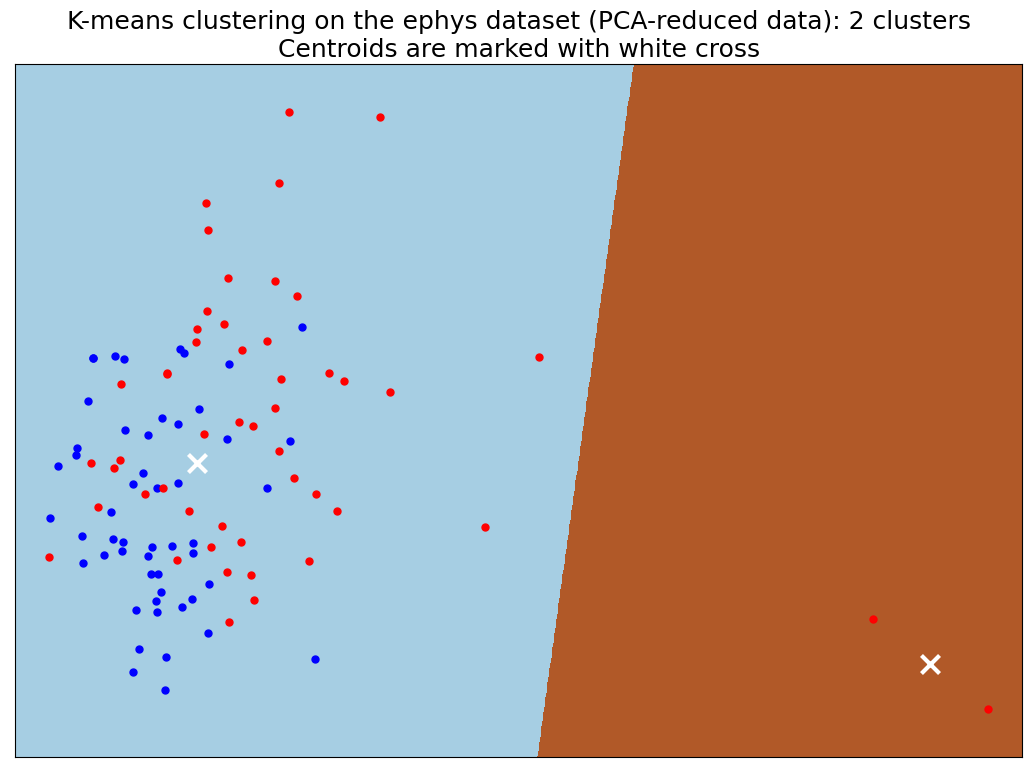

In [41]:
# run k-means on the code: 2 clusters


np.random.seed(20)

#digits = load_digits()
#data = scale(digits.data)
data = all_features_new_scaled

n_samples, n_features = data.shape
n_clusters = 2
labels = cell_type_14
#labels = digits.target

sample_size = 60

print("n_clusters: %d, \t n_samples %d, \t n_features %d"
      % (n_clusters, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_clusters, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_clusters, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_clusters).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_clusters, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# plot all WG1 
plt.plot(reduced_data[np.where(cell_type_14==1), 0], reduced_data[np.where(cell_type_14==1), 1], 'k.', markersize=10,color='blue')
plt.plot(reduced_data[np.where(cell_type_14==4), 0], reduced_data[np.where(cell_type_14==4), 1], 'k.', markersize=10,color='red')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the ephys dataset (PCA-reduced data): 2 clusters\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
Y.shape

# k-means clustering on tSNE data: 2 clusters

n_clusters: 2, 	 n_samples 102, 	 n_features 2
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.03s	327	0.232	0.234	0.233	0.295	0.227	0.461
random   	0.01s	327	0.232	0.234	0.233	0.295	0.227	0.461
PCA-based	0.00s	327	0.249	0.251	0.250	0.317	0.244	0.461
__________________________________________________________________________________


/var/folders/w7/d0tt48ts74s32x7nqxmpdkx80000gn/T/ipykernel_15556/534784957.py:83: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(reduced_data[np.where(cell_type_14==1), 0], reduced_data[np.where(cell_type_14==1), 1], 'k.', markersize=10,color='blue')
/var/folders/w7/d0tt48ts74s32x7nqxmpdkx80000gn/T/ipykernel_15556/534784957.py:84: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(reduced_data[np.where(cell_type_14==4), 0], reduced_data[np.where(cell_type_14==4), 1], 'k.', markersize=10,color='red')


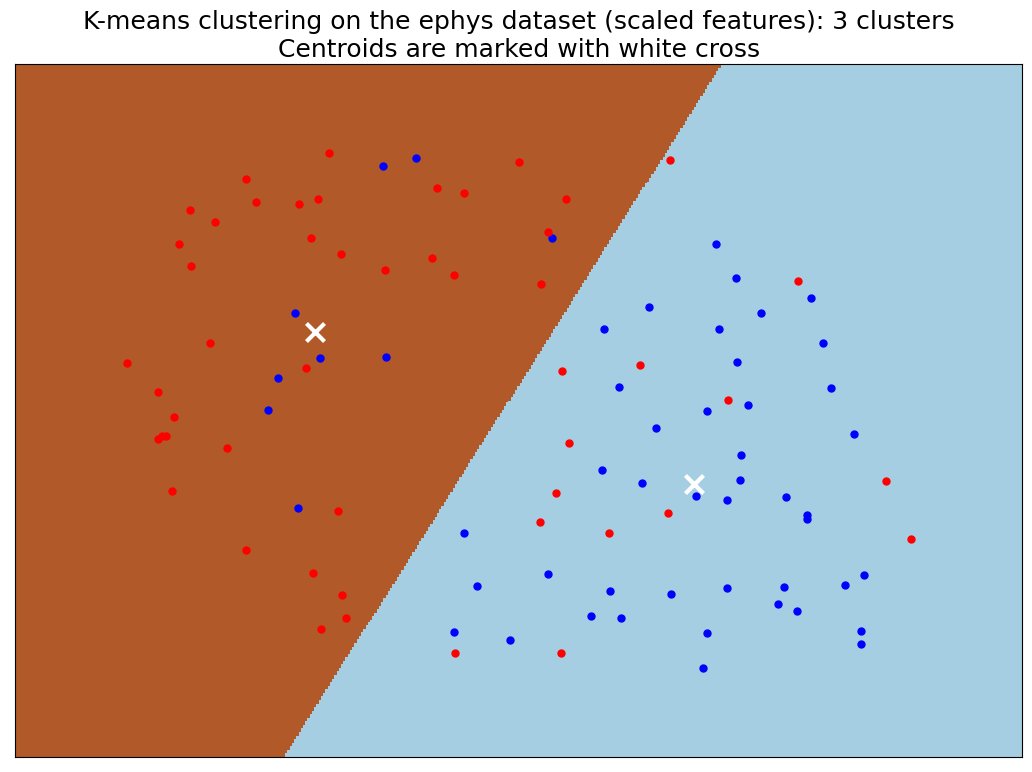

In [42]:
# run k-means on the code: 2 clusters


#np.random.seed(42)

data = Y

n_samples, n_features = data.shape
n_clusters = 2
labels = cell_type_14
#labels = digits.target

sample_size = len(all_features_new_scaled)

print("n_clusters: %d, \t n_samples %d, \t n_features %d"
      % (n_clusters, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_clusters, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_clusters, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_clusters).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_clusters, n_init=1),
              name="PCA-based",
              data=data)

print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

#reduced_data = PCA(n_components=2).fit_transform(data)

reduced_data = data

kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=5)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()].astype(np.float32))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# plot colors according to WG
plt.plot(reduced_data[np.where(cell_type_14==1), 0], reduced_data[np.where(cell_type_14==1), 1], 'k.', markersize=10,color='blue')
plt.plot(reduced_data[np.where(cell_type_14==4), 0], reduced_data[np.where(cell_type_14==4), 1], 'k.', markersize=10,color='red')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the ephys dataset (scaled features): 3 clusters\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()